# Credit Card Users Churn Prediction

##### Elige Grant
##### April 2021

## Data Description:

The dataset contains data on 10127 Thera bank customers. The data include customer demographic information (age, gender, income, martial status, number of kids, etc.), various basic customer information (still a customer, card category, months with the bank, how many products they utilize), as well as historical financial and/or transactional data (their credit limit, balances, availability of credit line, transaction dollars/counts, and other changes). Among these 10127 customers, 1627 (~16%) renounced their credit cards.

## Domain:

Banking/Credit

## Background and Context:

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

## Objective:

 1. Explore and visualize the dataset.
 2. Build a classification model to predict if the customer is going to churn or not
 3. Optimize the model using appropriate techniques
 4. Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

### Customer Details:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


## Steps and Tasks:

### 00 - Load libraries and data (view/summarize data)

In [105]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [2]:
#Loading dataset
data=pd.read_csv("BankChurners.csv")

In [3]:
# View first and last 5 rows of Data (Columns 1 - 5)
data.iloc[:,:5]

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count
0      768805383  Existing Customer            45      M                3
1      818770008  Existing Customer            49      F                5
2      713982108  Existing Customer            51      M                3
3      769911858  Existing Customer            40      F                4
4      709106358  Existing Customer            40      M                3
...          ...                ...           ...    ...              ...
10122  772366833  Existing Customer            50      M                2
10123  710638233  Attrited Customer            41      M                2
10124  716506083  Attrited Customer            44      F                1
10125  717406983  Attrited Customer            30      M                2
10126  714337233  Attrited Customer            43      F                2

[10127 rows x 5 columns]

In [4]:
# View first and last 5 rows of Data (Columns 6 - 10)
data.iloc[:,5:10]

Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  
0                  39  
1                  44  
2                  36  
3                  34  
4                  21  
...               ...  
10122              40  
10123              25  
10124              36  
10125              36  
10126              25  

[10127 rows x 5 columns]

In [5]:
# View first and last 5 rows of Data (Columns 11 - 15)
data.iloc[:,10:15]

Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  
0                          3       12691.0                  777  
1                          2        8256.0                  864  
2                          0        3418.0                    0  
3                          1        3313.0                 2517  
4                          0        4716.0                    0  
...                      ...           ...                  ...  
10122                      3        4003.0                 1851  
10123                      3        4277.0                 2186  
10124                      4        5409.0                    0  
10125                      3        5281.0                    0  
10126                      4       10388.0                 1961  

[10127 rows x 5 columns]

In [6]:
# View first and last 5 rows of Data (Columns 16 - 21)
data.iloc[:,15:21]

Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                    1.625                  0.061  
1                    3.714                  0.105  
2                    2.333                  0.000  
3                    2.333                  0.760  
4                    2.500                  0.000  
...                    ...                    ...  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[10127 rows x 6 columns]

In [7]:
# Check data types and number of non-null values for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
data.isna().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [9]:
# Summary numerical data
data.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   
Unnamed: 21                   0.0           NaN           NaN          NaN   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   
Unnamed: 21                        NaN           NaN           NaN   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01  
Unnamed: 21                        NaN

In [10]:
# Check the unique values in each column of the dataframe.
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
Unnamed: 21                     0
dtype: int64

In [11]:
# Check to see if there are duplicate rows
data.duplicated().sum()

0

In [12]:
# Value counts for all categorical items
cat_cols=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------


#### Summary

* There are total 21 columns (22 shown because an extra *comma* was placed at the end of each line) and 10127 number of rows in the dataset.
* Column data type is either integer (10 columns), float (5 columns), or object type (6 columns). We may need to recast the object columns as a different data type (e.g., one-hot encoding)
* All the columns do not appear to have any null values, however there are several categorical items with "UNKNOWN" as their value - "Education_Level" / "Marital_Status" / "Income_Category" - which will likely need to be dealt with.

#### Basic Statistics

* CLIENTNUM:
 * Not likely to be important
 * Random IDs
* Attrition_Flag:
 * THIS IS THE TARGET VARIABLE
 * Binary (either they are/aren't a credit card customer anymore)
 * Most are still customers (84%)
* Customer_Age:
 * Min is 26
 * Max is 73
 * Mean/Median is ~46
* Gender: Gender of the account holder
 * 47/53 percent spilt between Male/Female
* Dependent_count:
 * Min is 0
 * Max is 5
 * Mean/Median is ~2
* Education_Level: 
 * Typical looking distribution
 * However, 1519 (~15%) is UNKNOWN
* Marital_Status: 
 * Typical looking distribution
 * However, 749 (~7.5%) is UNKNOWN
* Income_Category:
 * Typical looking distribution
 * However, 1112 (~11%) is UNKNOWN
* Card_Category: 
 * Typical looking distribution (more cards for cheapest annual fee, less for most annual fee)
* Months_on_book:
 * Min is 13
 * Max is 56
 * Mean/Median is ~36
* Total_Relationship_Count: 
 * Min is 1
 * Max is 6
 * Mean/Median is ~4
* Months_Inactive_12_mon: 
 * Min is 0
 * Max is 6
 * Avg/Median is ~2
* Contacts_Count_12_mon: 
 * Min is 0
 * Max is 6
 * Mean/Median is ~2
* Credit_Limit: 
 * Min is ~1440
 * Max is ~34515
 * Mean is ~8630
 * Median is ~4550 (almost 50% the mean!)
* Total_Revolving_Bal:  
 * Min is 0
 * Max is 2517
 * Mean is ~815
 * Median is 1276
* Avg_Open_To_Buy:   
 * Min is 3
 * Max is 34516
 * Mean is ~9090
 * Median is 3474
* Total_Amt_Chng_Q4_Q1:    
 * Min is 0
 * Max is 3.4
 * Mean is ~0.76
 * Median is ~0.74
* Total_Trans_Amt:   
 * Min is 510
 * Max is 18484
 * Mean is ~4400
 * Median is ~3900
* Total_Trans_Ct:   
 * Min is 10
 * Max is 139
 * Mean is ~65
 * Median is 67
* Total_Ct_Chng_Q4_Q1:   
 * Min is 0
 * Max is ~3.7
 * Mean is ~0.71
 * Median is ~0.7
* Avg_Utilization_Ratio:   
 * Min is 0
 * Max is ~1
 * Mean is ~0.27
 * Median is ~0.18

#### Fix data (early)

In [13]:
# Remove Unnecessary Columns & Check to see if there are still NO duplicate rows
data.pop("CLIENTNUM")
data.pop("Unnamed: 21")
data.duplicated().sum()

0

In [14]:
# Summary numerical data (without extra columns)
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

In [15]:
# Let's also go ahead and flip the TARGET values from objects to integers (0 or 1)
# 0 - Existing Customer
# 1 - Attrited Customer

# Attrition_Flag
data.loc[data['Attrition_Flag'] == 'Existing Customer','Attrition_Flag']=0
data.loc[data['Attrition_Flag'] == 'Attrited Customer','Attrition_Flag']=1

# Change Type to INT
data["Attrition_Flag"] = data["Attrition_Flag"].astype("int")

### 01 - Perform an Exploratory Data Analysis on the data (6)
- Univariate analysis 
- Bivariate analysis 
- Use appropriate visualizations to identify the patterns and insights 
- Any other exploratory deep dive

#### Univariate Analysis

In [16]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [17]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

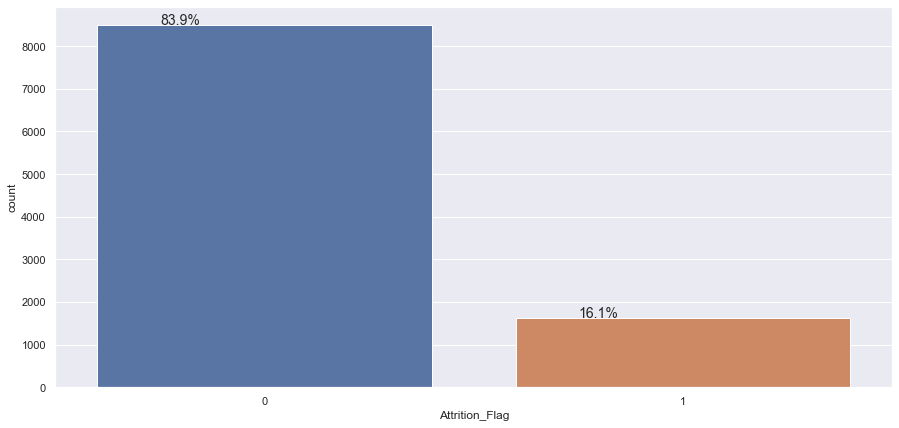

In [18]:
# Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
perc_on_bar(data['Attrition_Flag'])

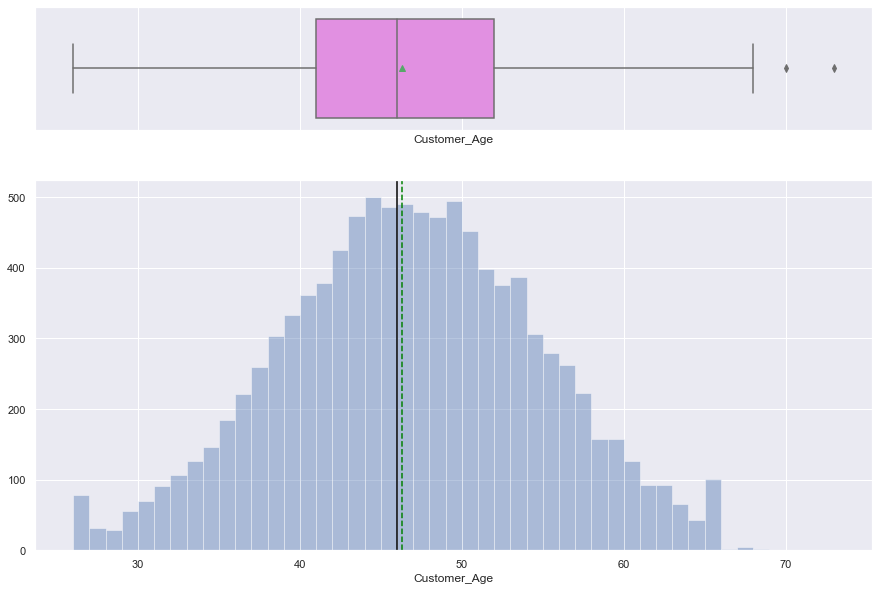

In [19]:
# Customer_Age: Age in Years
histogram_boxplot(data['Customer_Age'])

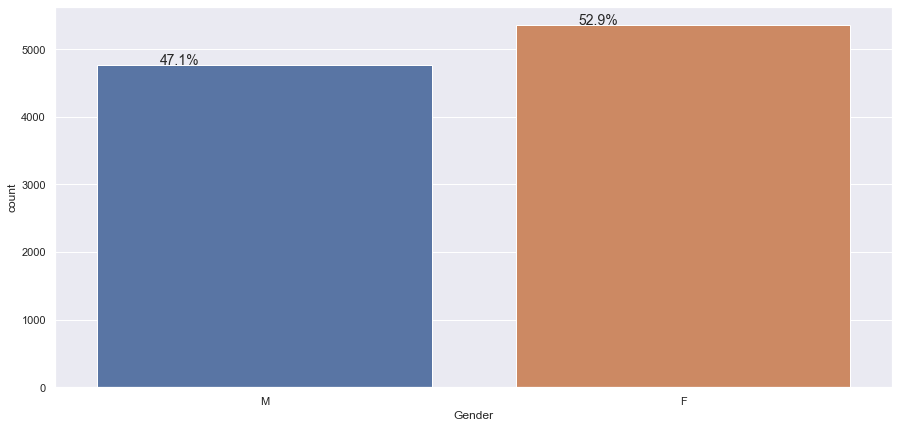

In [20]:
# Gender: Gender of the account holder
perc_on_bar(data['Gender'])

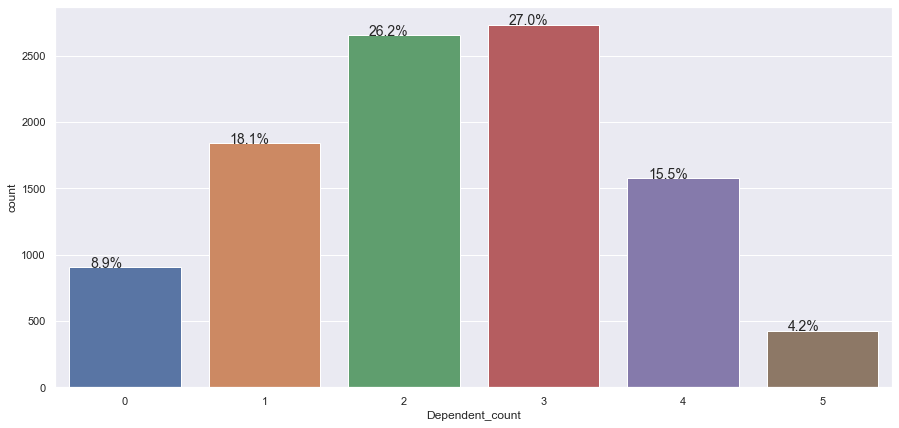

In [21]:
# Dependent_count: Number of dependents
perc_on_bar(data['Dependent_count'])

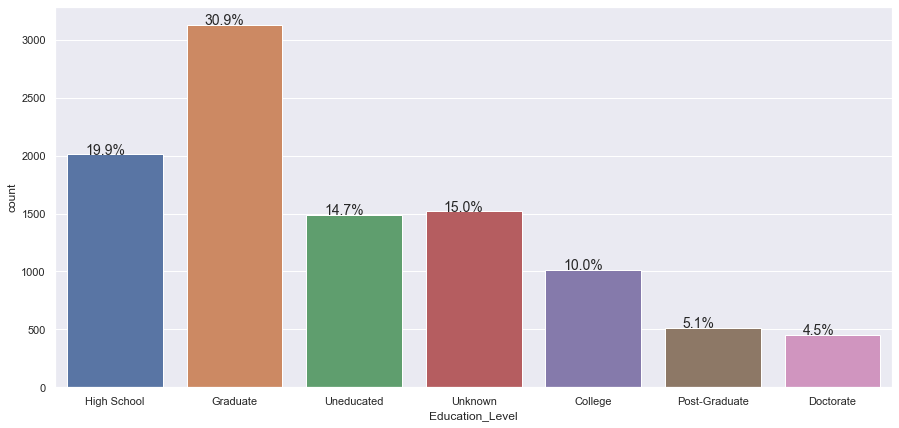

In [22]:
# Education_Level: Educational Qualification of the account holder
perc_on_bar(data['Education_Level'])

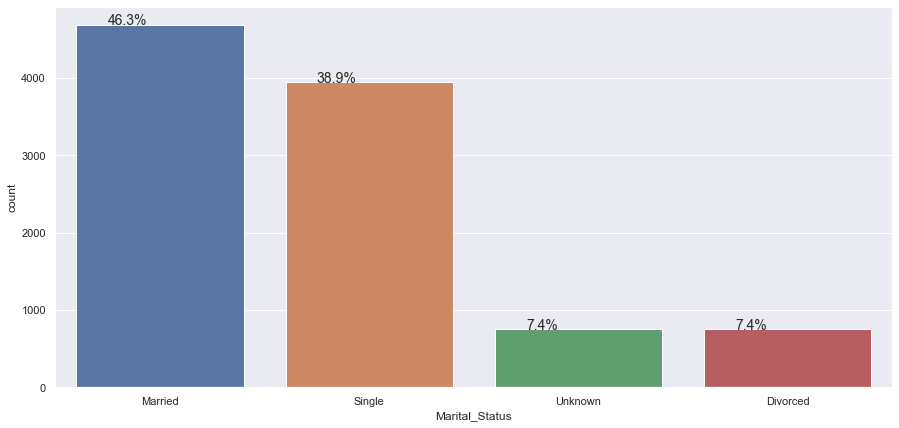

In [23]:
# Marital_Status: Marital Status of the account holder
perc_on_bar(data['Marital_Status'])

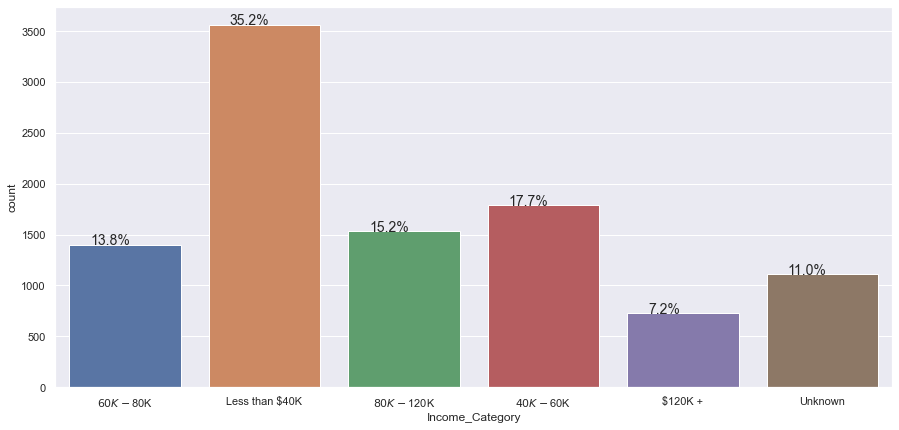

In [24]:
# Income_Category: Annual Income Category of the account holder
perc_on_bar(data['Income_Category'])

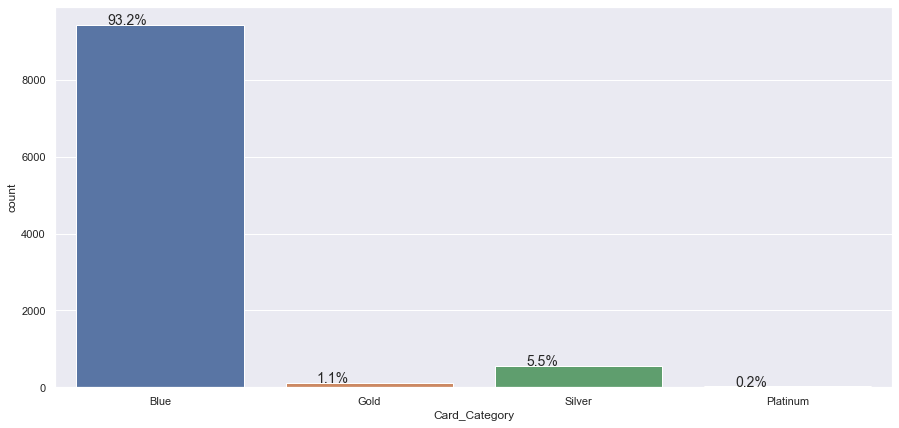

In [25]:
# Card_Category: Type of Card
perc_on_bar(data['Card_Category'])

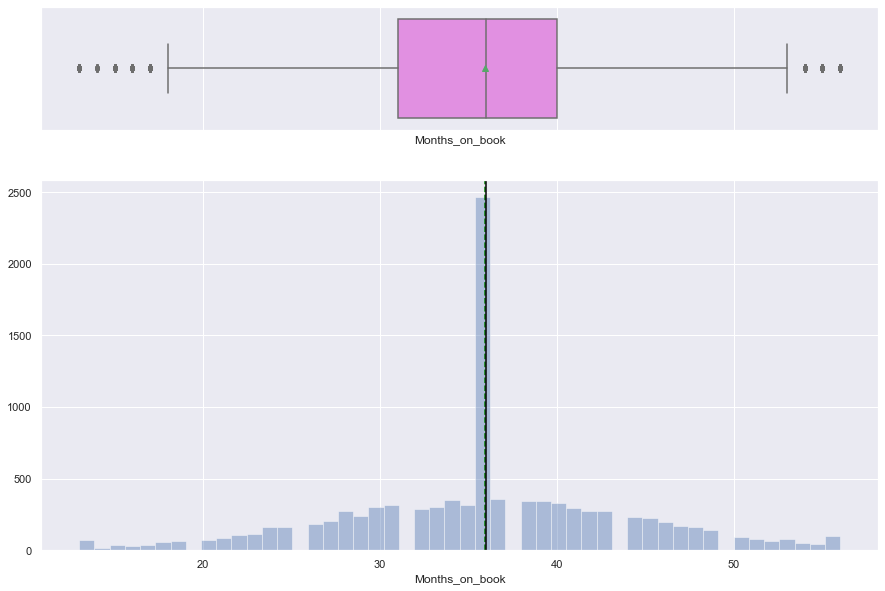

In [26]:
# Months_on_book: Period of relationship with the bank
histogram_boxplot(data['Months_on_book'])

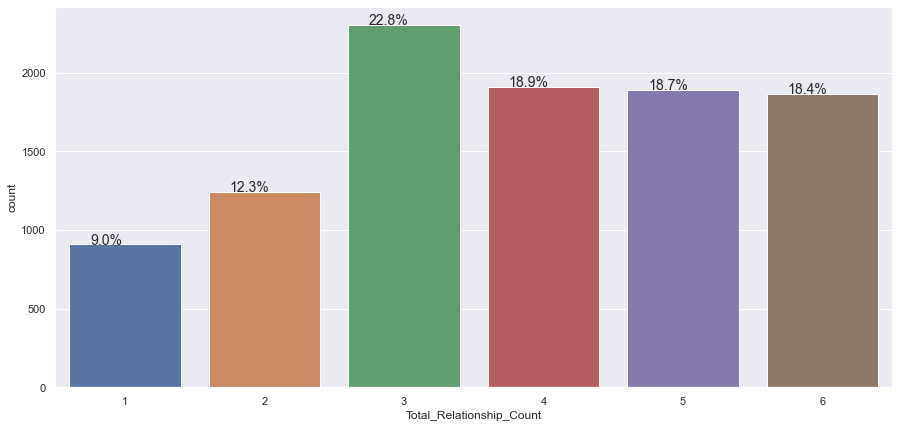

In [27]:
# Total_Relationship_Count: Total no. of products held by the customer
perc_on_bar(data['Total_Relationship_Count'])

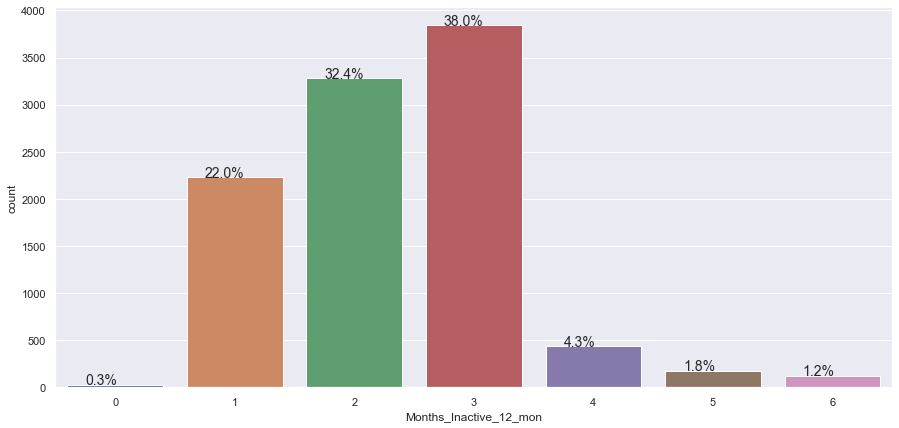

In [28]:
# Months_Inactive_12_mon: No. of months inactive in the last 12 months
perc_on_bar(data['Months_Inactive_12_mon'])

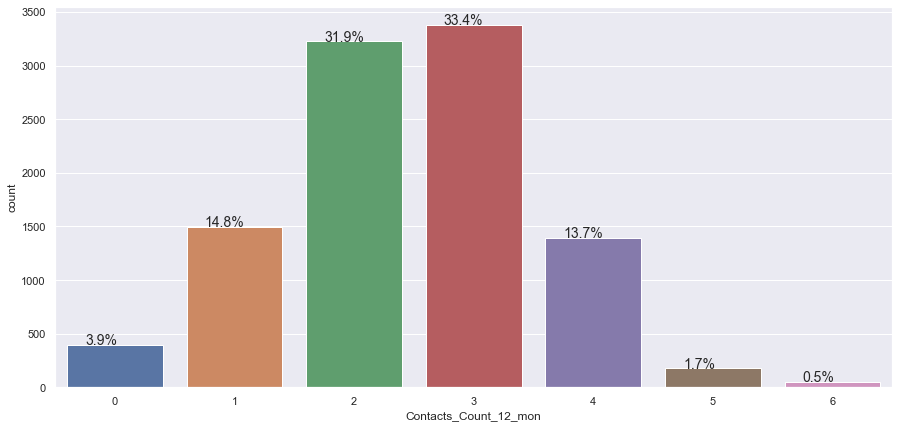

In [29]:
# Contacts_Count_12_mon: No. of Contacts in the last 12 months
perc_on_bar(data['Contacts_Count_12_mon'])

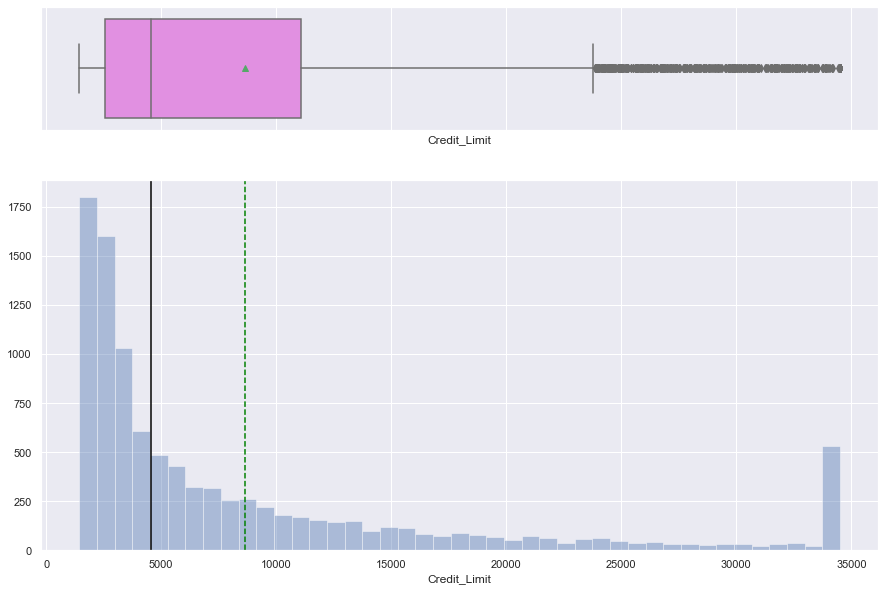

In [30]:
# Credit_Limit: Credit Limit on the Credit Card
histogram_boxplot(data['Credit_Limit'])

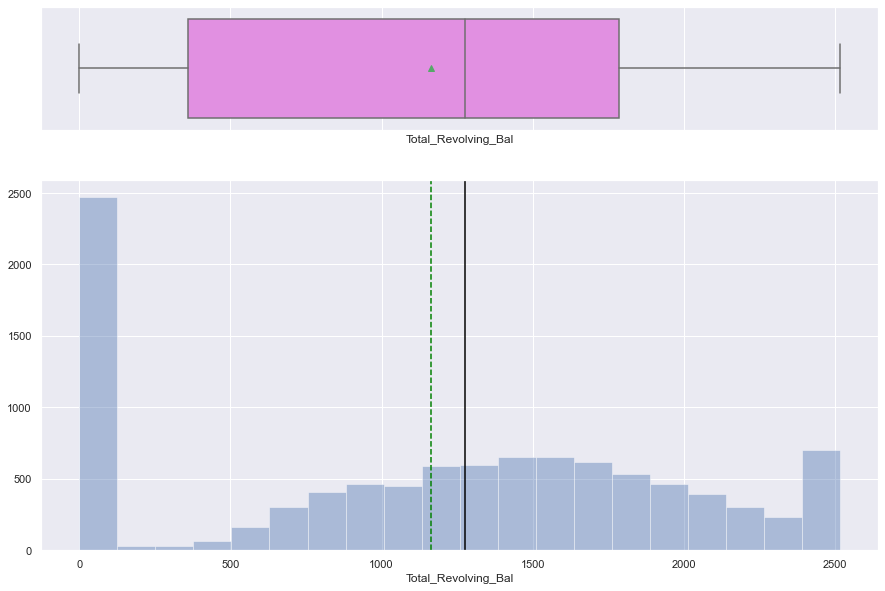

In [31]:
# Total_Revolving_Bal: Total Revolving Balance on the Credit Card
histogram_boxplot(data['Total_Revolving_Bal'])

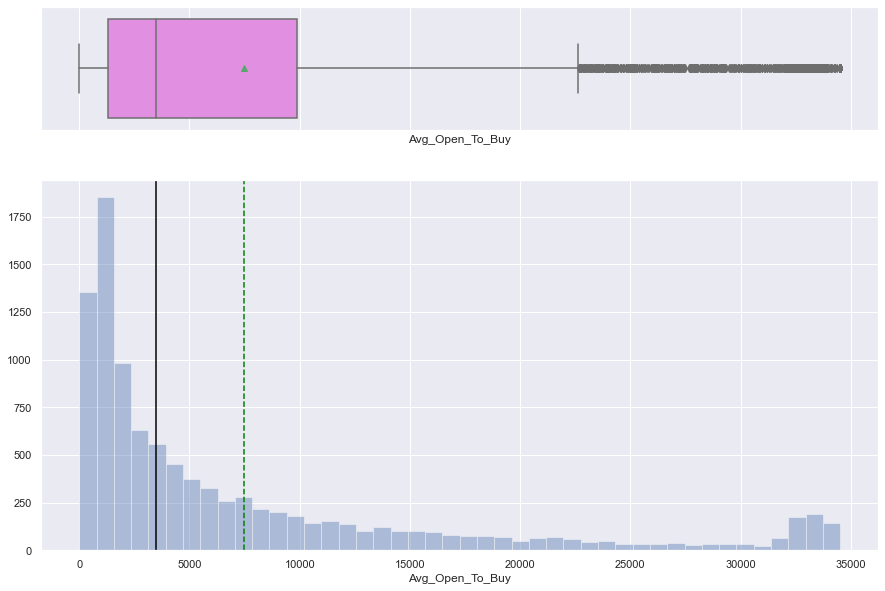

In [32]:
# Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
histogram_boxplot(data['Avg_Open_To_Buy'])

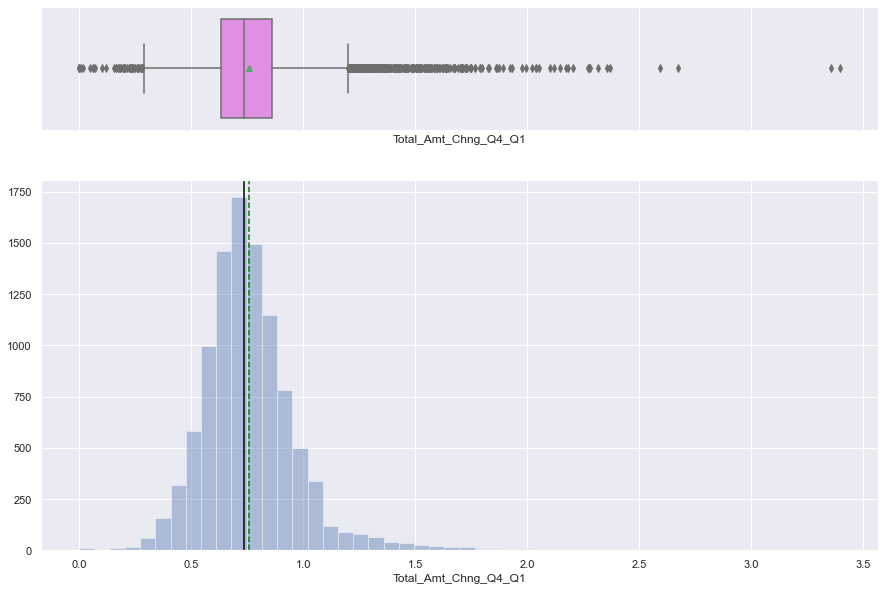

In [33]:
# Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

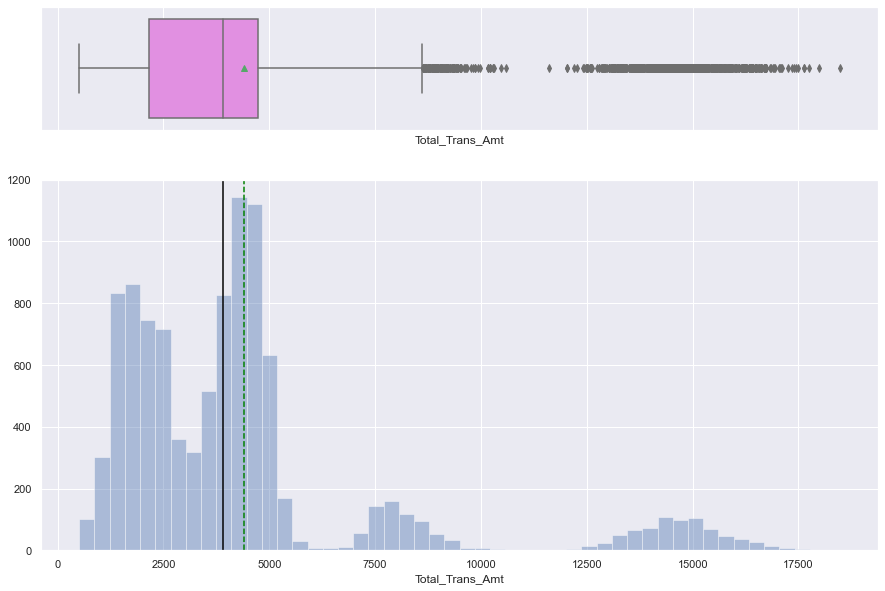

In [34]:
# Total_Trans_Amt: Total Transaction Amount (Last 12 months)
histogram_boxplot(data['Total_Trans_Amt'])

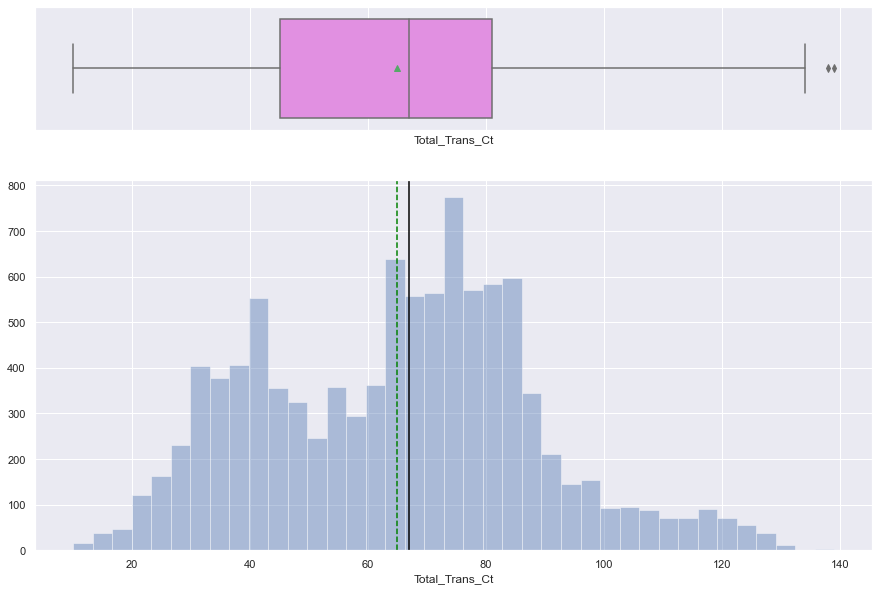

In [35]:
# Total_Trans_Ct: Total Transaction Count (Last 12 months)
histogram_boxplot(data['Total_Trans_Ct'])

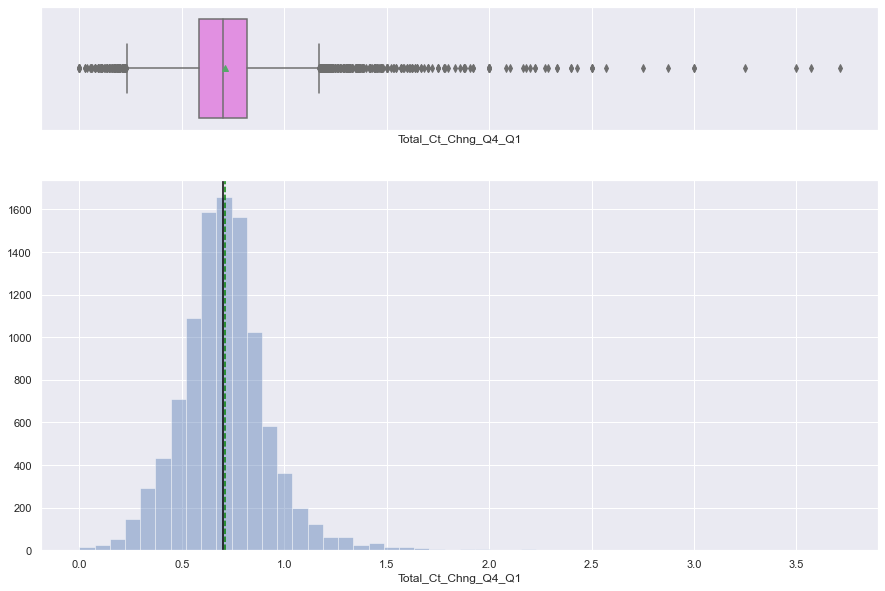

In [36]:
# Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
histogram_boxplot(data['Total_Ct_Chng_Q4_Q1'])

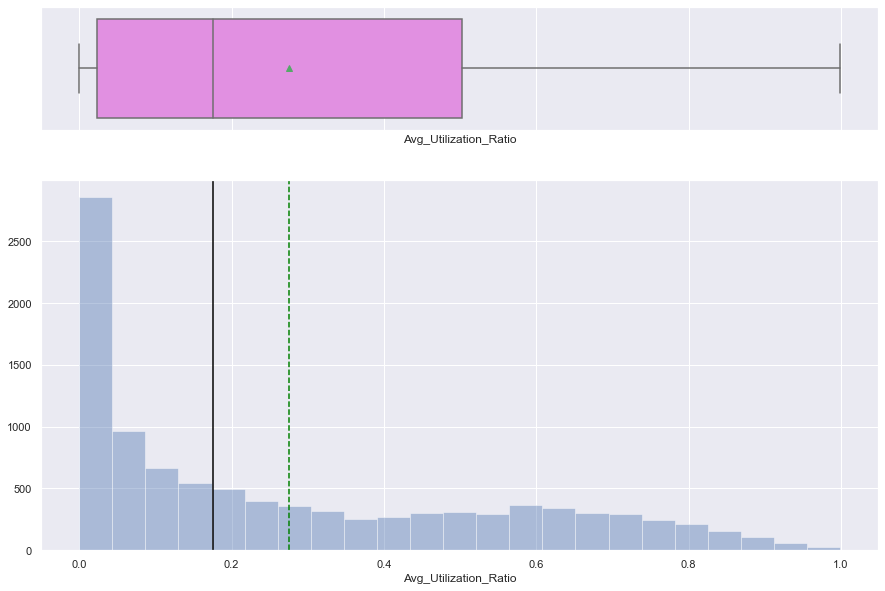

In [37]:
# Avg_Utilization_Ratio: Average Card Utilization Ratio
histogram_boxplot(data['Avg_Utilization_Ratio'])

##### Observations

1. Almost 93% of clients have the blue card (another 5% have the silver), so there is a significant bias towards the "lower" end card
2. The values associated with the total period of time a client has been with the bank is very normally distributed - however there is a weird jump right at 36 months (3 years) - is this when an introductory rate/perk ends?
3. A significant number of folks have 0 revolving balance
4. (A) Total transaction amount has 4 peaks in the data - 2000, 4500 (biggest), 8000, and 14000 (smallest)
4. (B) Total transaction count has 2 peaks in the data - 40 and 75
5. Average credit card utilization is dominated by close to 0 utilization

#### Bivariate Analysis

##### Pairplot only continuous features

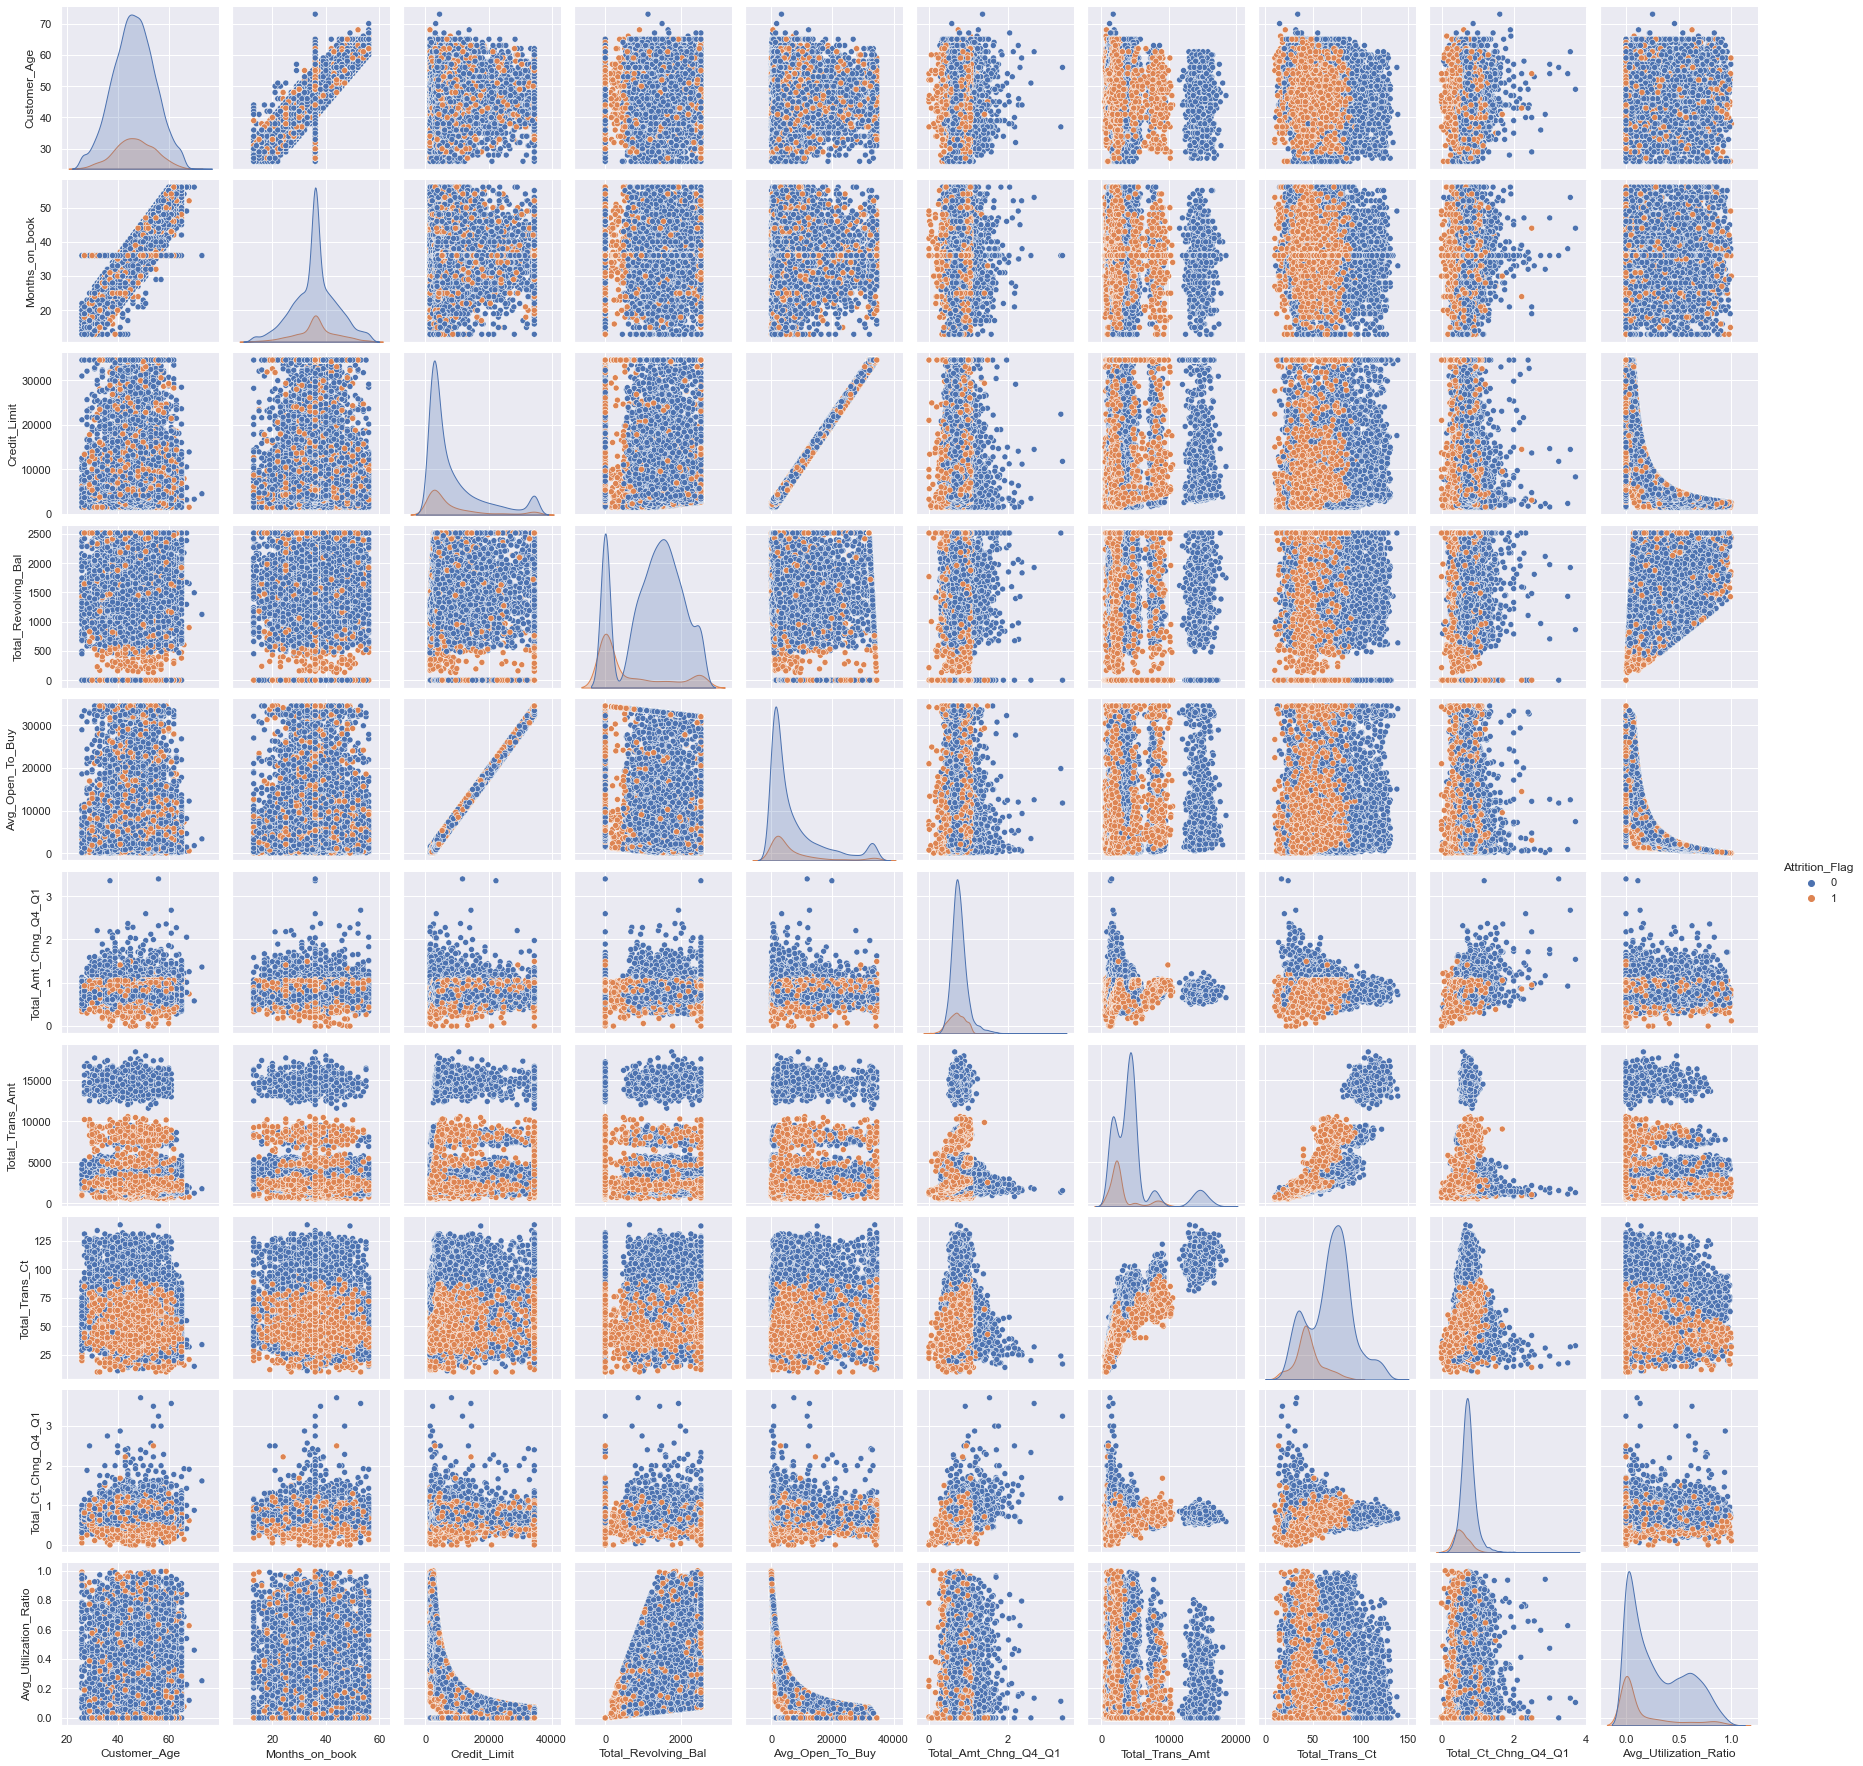

In [38]:
#Pairplot only continuous features to get basic feel
sns.pairplot(data=data,hue="Attrition_Flag",vars=['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'])
plt.show()


- Attritioners appear to have lower transaction count/amount & lower change in transaction count/amounts
- Very linear (almost perfect 1-to-1) relationship between Credit Limit & Avg Open to Buy Credit Line (Maybe able to remove the latter)
- Near linear (almost 1-to-1) relationship between Customer Age & Months on the book (Maybe able to use this information to "fix" anomalous data points occuring at 36 months on the books 

##### Correlation Check

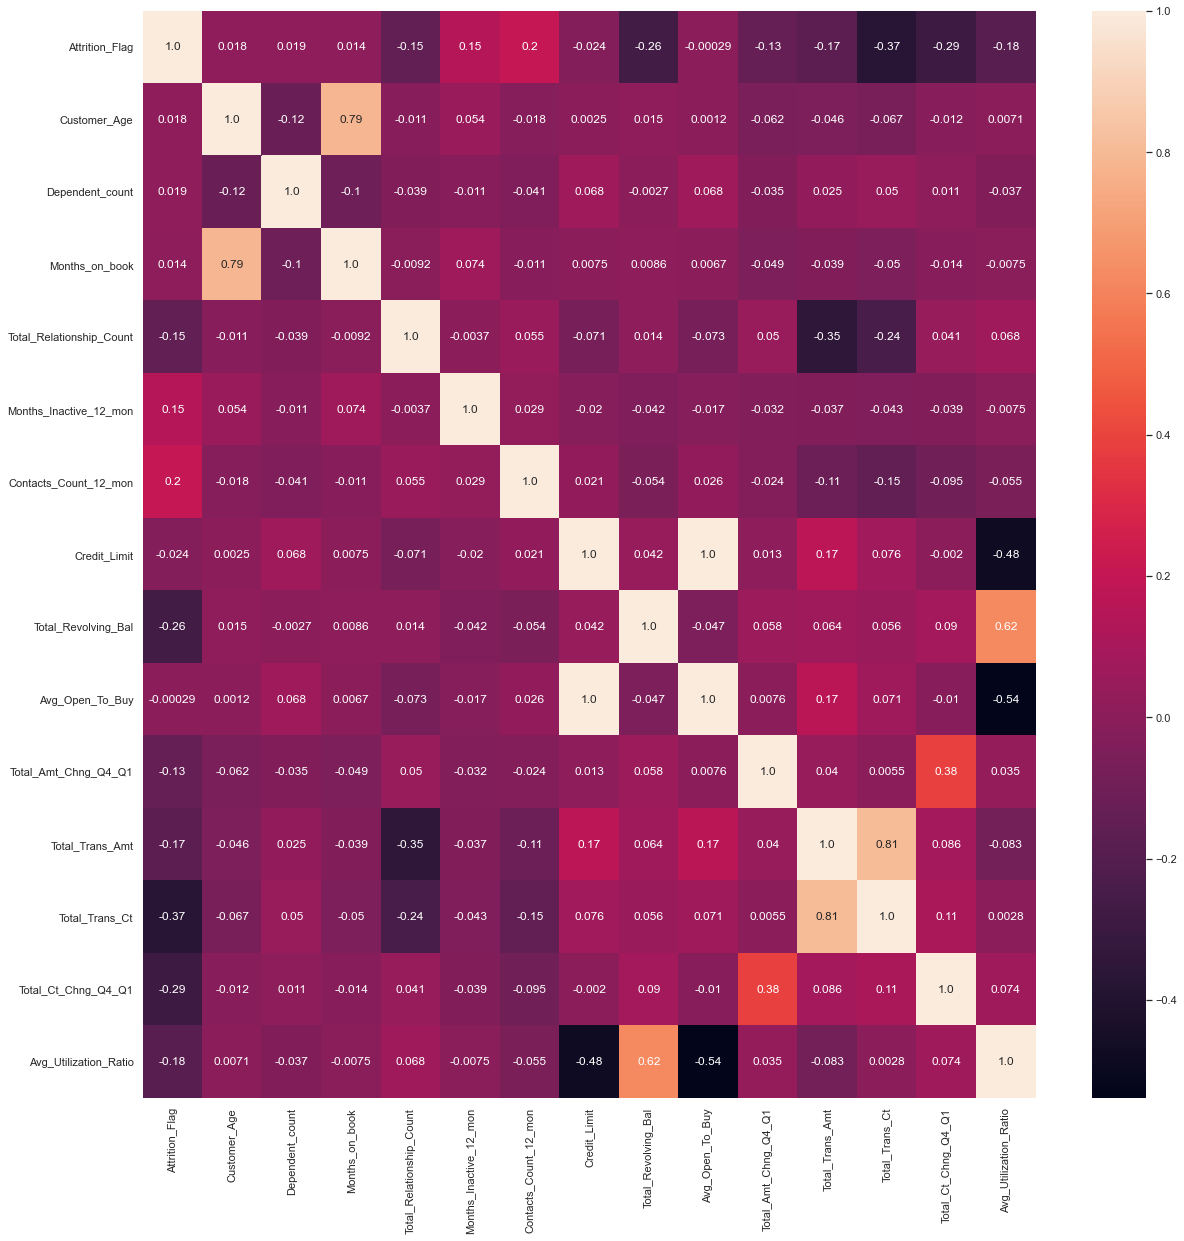

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

* Strong (Positive) Correlators [0.8 - 1]
 1. Customer_Age and Months_on_book
 2. Credit_Limit and Avg_Open_To_Buy
 3. Total_Trans_Amt and Total_Trans_Ct
* Moderate (Positive) Correlators [0.6 - 0.8]
 1. Avg_Utilization_Ratio and Total_Revolving_Bal
* Weak (Positve AND Negative) Correlators [0.4 - 0.6]
 1. Credit_Limit and Avg_Utilization_Ratio (-)
 2. Avg_Open_To_Buy and Avg_Utilization_Ratio (-)
 3. Total_Ct_Chng_Q4_to_Q1 and Total_Amt_Chng_Q4_to_Q1 (+)
 

##### Countplots Features WRT Atrrition_Flag (Categorical)

In [40]:
def perc_on_bar_with_hue(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, hue=data['Attrition_Flag'])
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2  - 0.05# width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

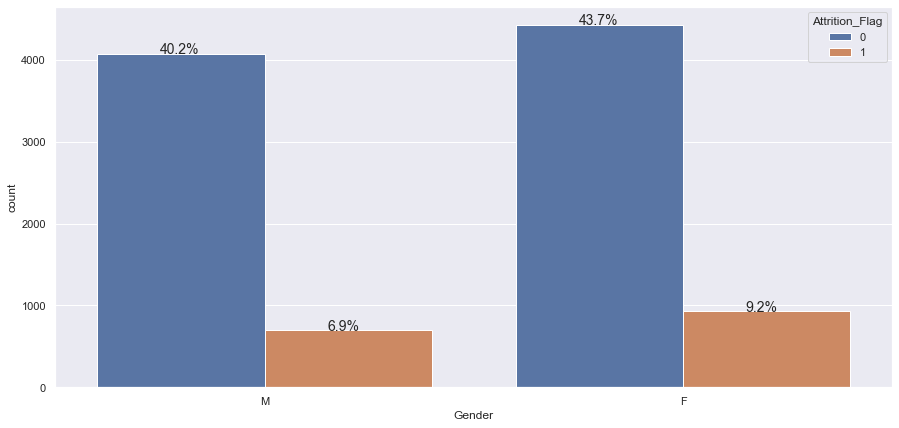

In [41]:
# Gender
perc_on_bar_with_hue(data['Gender'])

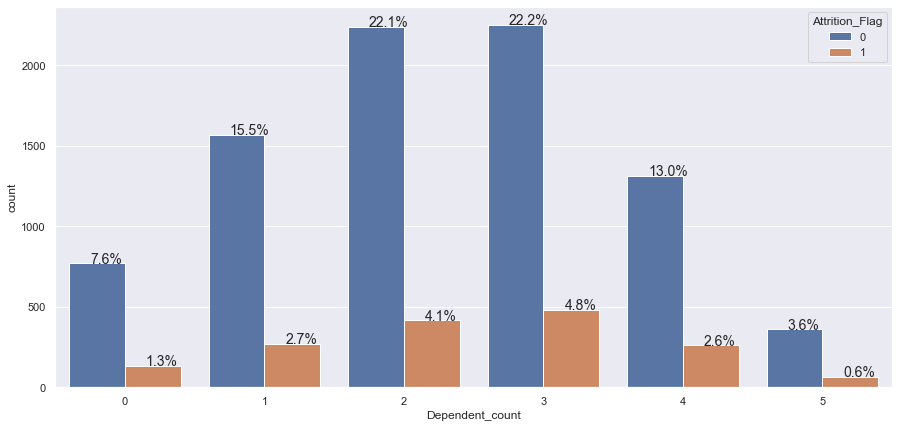

In [42]:
# Dependent_count
perc_on_bar_with_hue(data['Dependent_count'])

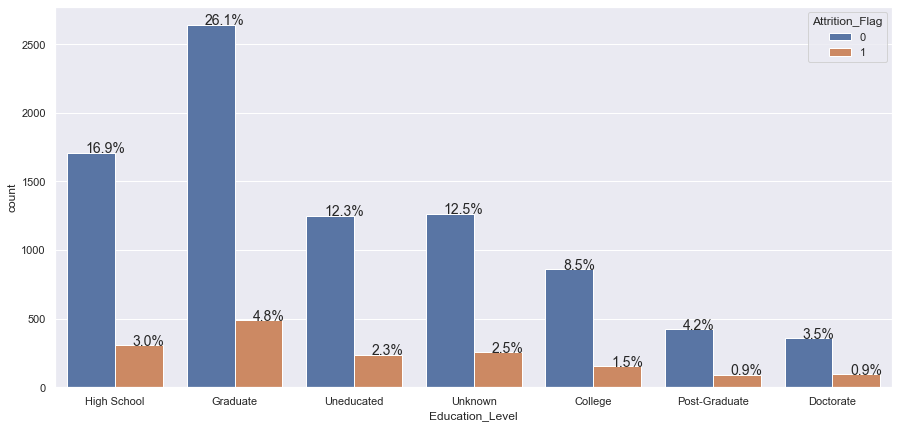

In [43]:
# Education_Level
perc_on_bar_with_hue(data['Education_Level'])

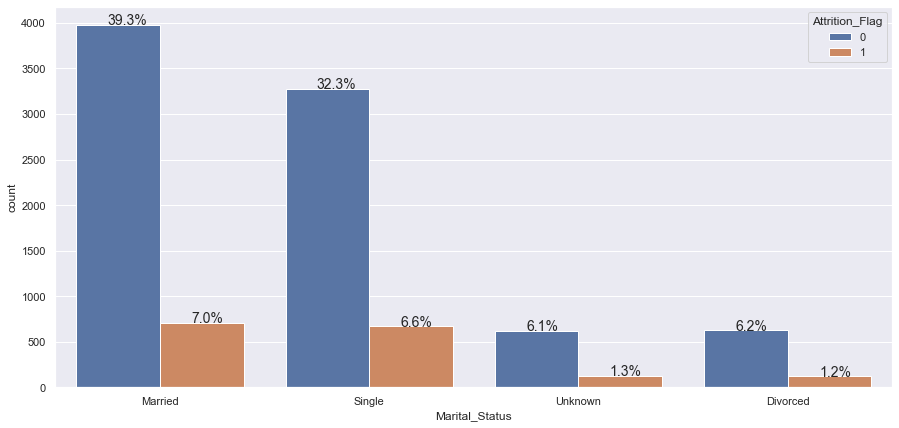

In [44]:
# Marital_Status
perc_on_bar_with_hue(data['Marital_Status'])

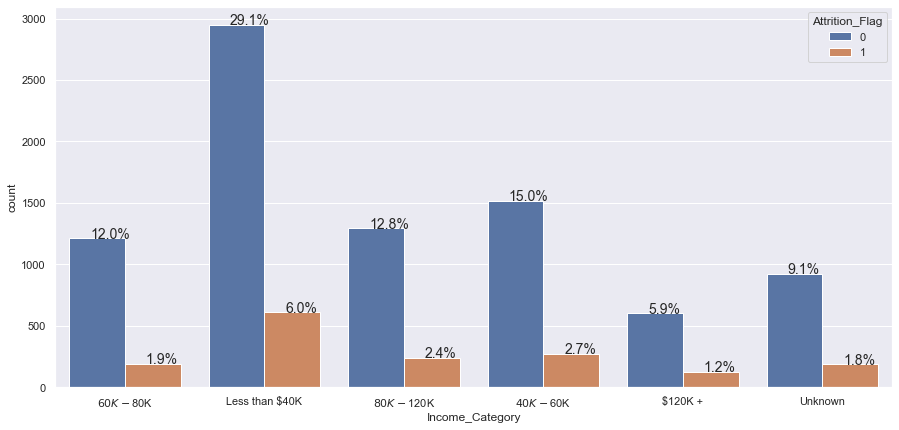

In [45]:
# Income_Category
perc_on_bar_with_hue(data['Income_Category'])

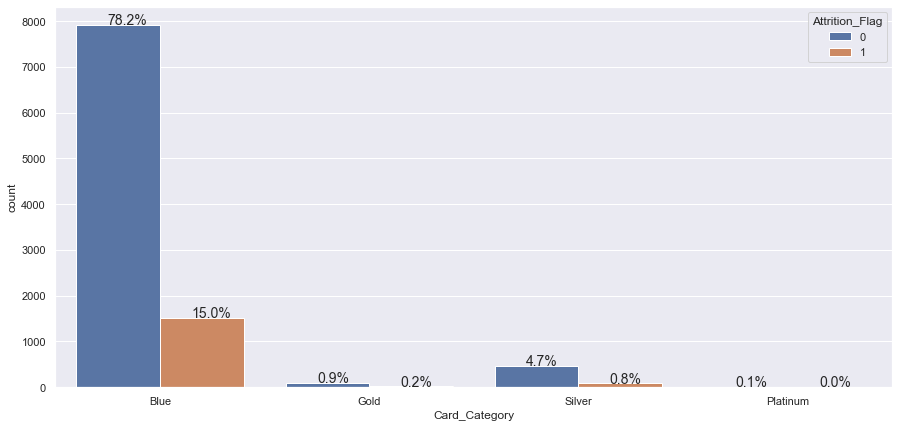

In [46]:
# Card_Category
perc_on_bar_with_hue(data['Card_Category'])

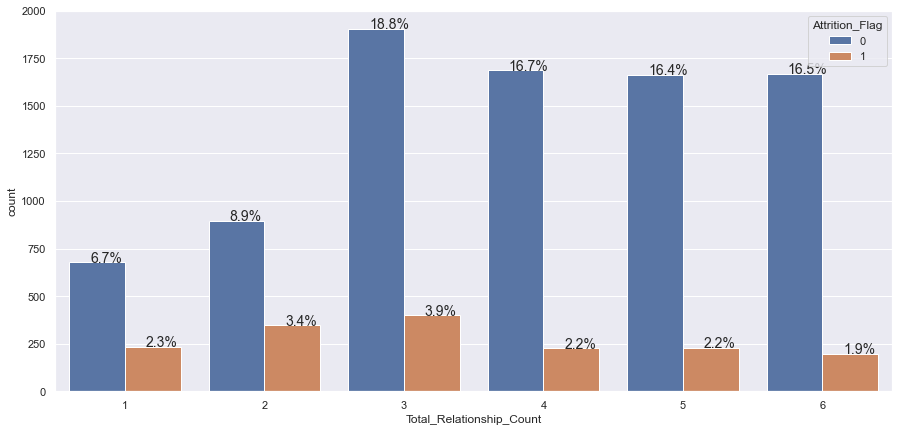

In [47]:
# Total_Relationship_Count
perc_on_bar_with_hue(data['Total_Relationship_Count'])

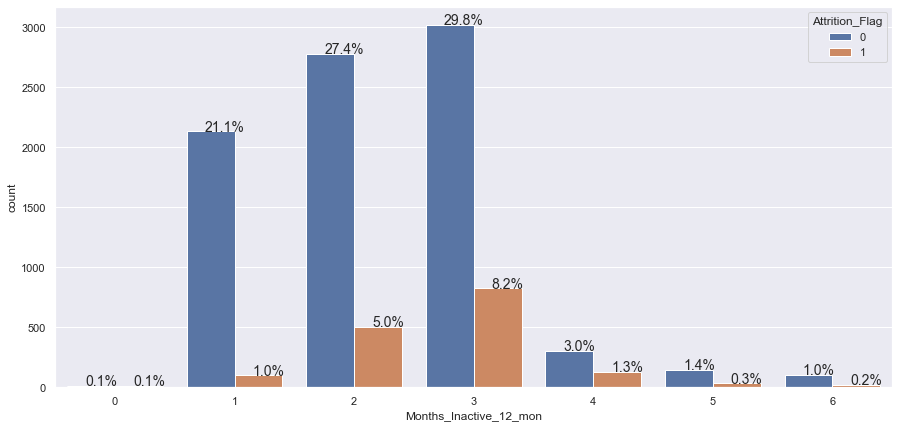

In [48]:
# Months_Inactive_12_mon
perc_on_bar_with_hue(data['Months_Inactive_12_mon'])

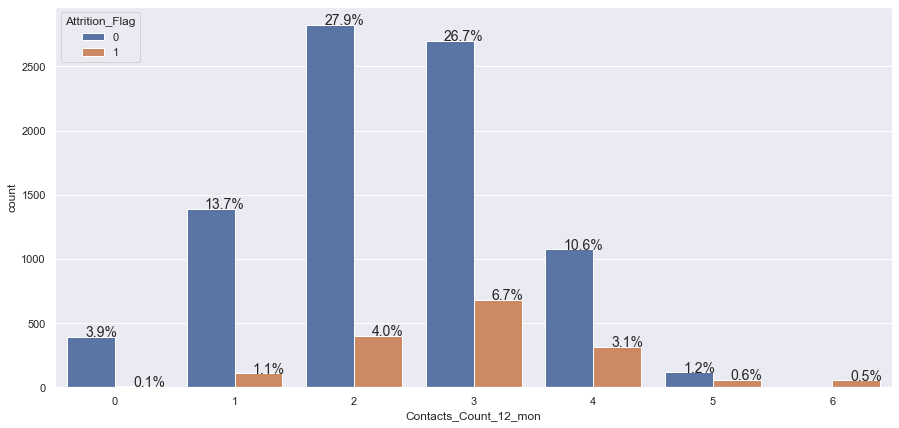

In [49]:
# Contacts_Count_12_mon
perc_on_bar_with_hue(data['Contacts_Count_12_mon'])

3 main observations
- Most plots tend to show a proportional increase/decrease of attrition with increased/decreased continuing customers
- An exception might be Total_Relationship_Count, which seems to have a larger proportion of attrited customers the smaller this feature is
- The vast majority of attrited & non-attrited customers have the basic "Blue" credit card, may need to employ some technique to reduce bias toward predicting just these customers (or create separate models for each card type?) 

##### Countplots Features WRT Atrrition_Flag (Continuous-ish)

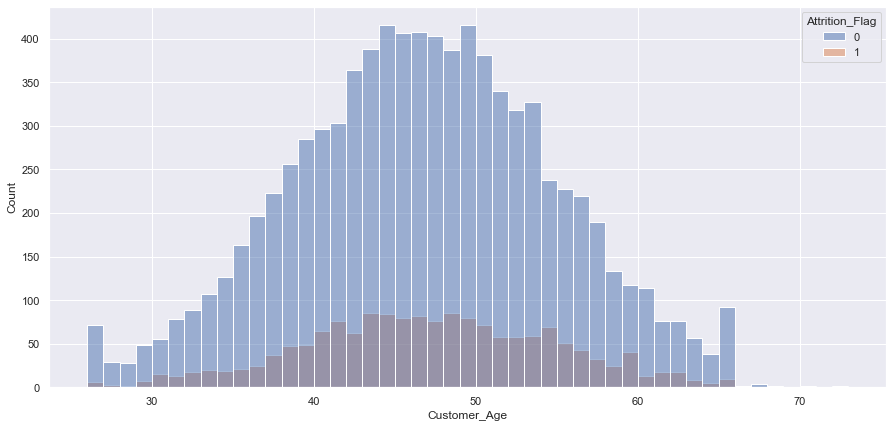

In [50]:
# Customer_Age
ax = sns.histplot(x='Customer_Age', data=data, hue=data['Attrition_Flag']);
#ax.set_xlim([0,12])

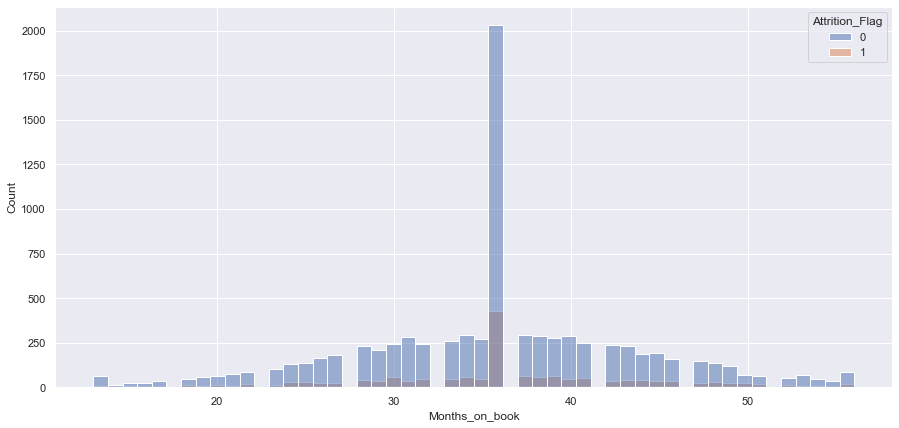

In [51]:
# Months_on_book
ax = sns.histplot(x='Months_on_book', data=data, hue=data['Attrition_Flag']);
#ax.set_xlim([0,12])

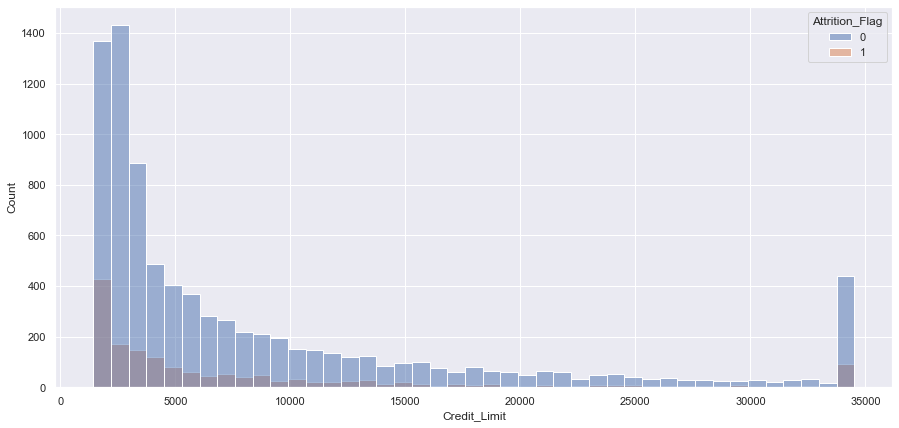

In [52]:
# Credit_Limit
ax = sns.histplot(x='Credit_Limit', data=data, hue=data['Attrition_Flag']);
#ax.set_xlim([0,12])

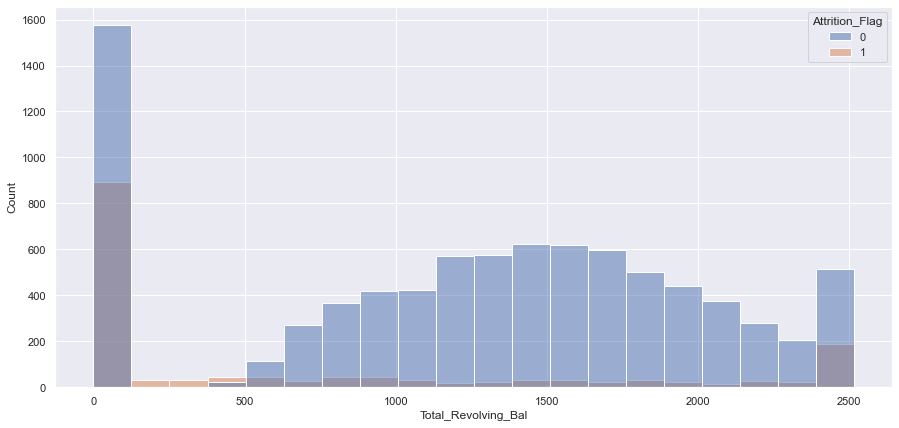

In [53]:
# Total_Revolving_Bal
ax = sns.histplot(x='Total_Revolving_Bal', data=data, hue=data['Attrition_Flag']);
#ax.set_xlim([0,12])

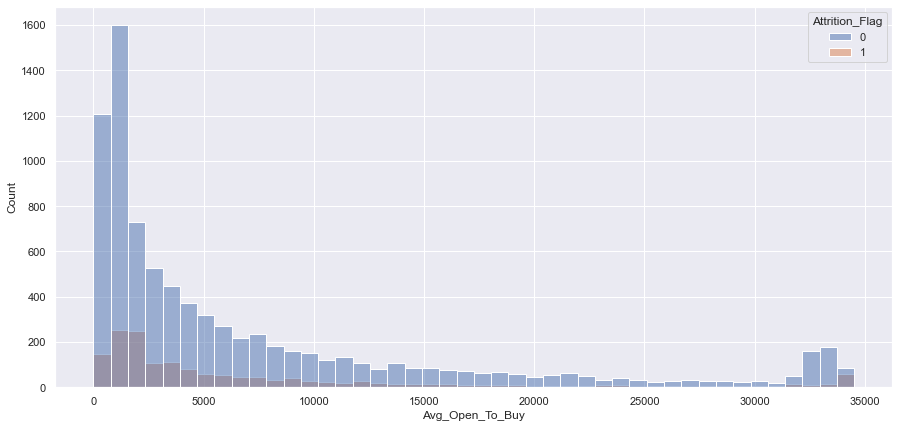

In [54]:
# Avg_Open_To_Buy
ax = sns.histplot(x='Avg_Open_To_Buy', data=data, hue=data['Attrition_Flag']);
#ax.set_xlim([0,12])

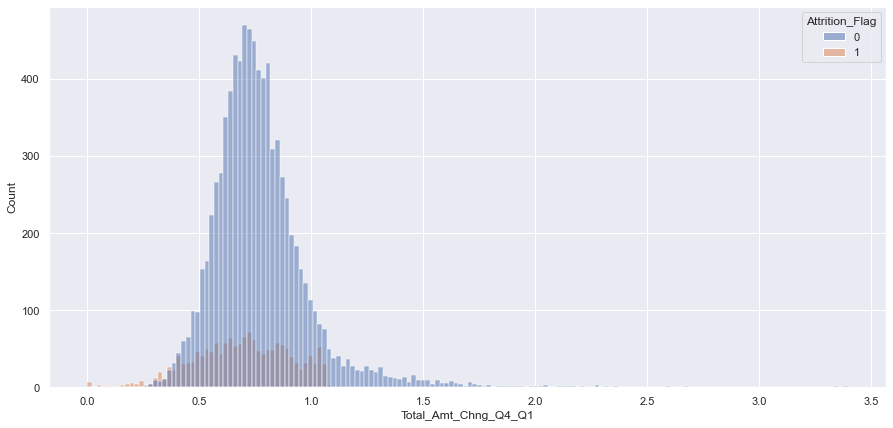

In [55]:
# Total_Amt_Chng_Q4_Q1
ax = sns.histplot(x='Total_Amt_Chng_Q4_Q1', data=data, hue=data['Attrition_Flag']);
#ax.set_xlim([0,12])

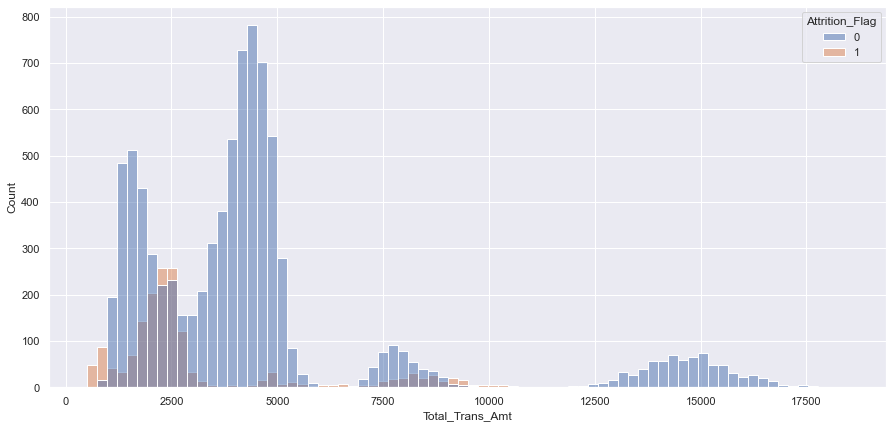

In [56]:
# Total_Trans_Amt
ax = sns.histplot(x='Total_Trans_Amt', data=data, hue=data['Attrition_Flag']);
#ax.set_xlim([0,12])

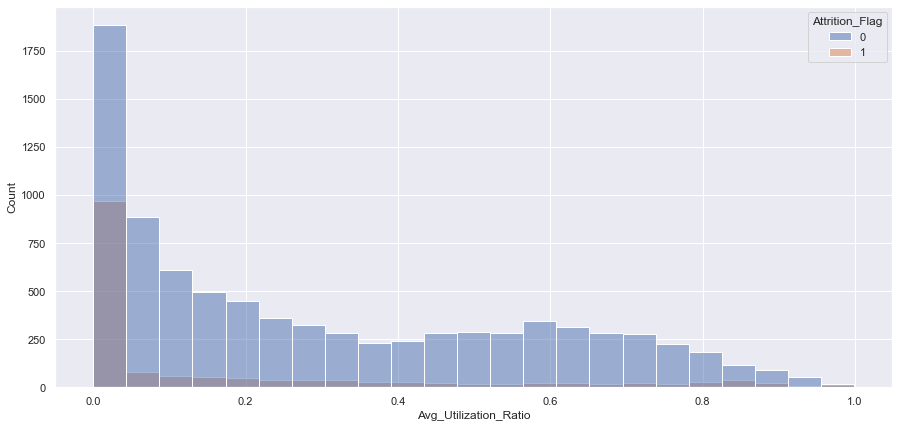

In [57]:
# Avg_Utilization_Ratio
ax = sns.histplot(x='Avg_Utilization_Ratio', data=data, hue=data['Attrition_Flag']);
#ax.set_xlim([0,12])

Attrited customers tend to have/be:

Lower
- Credit_Limit (except for Highest Limit)
- Total_Revolving_Bal (except for Highest Limit)
- Avg_Open_To_Buy (except for Highest Limit)
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt
- Avg_Utilization_Ratio

The Very Highest:
- Credit_Limit
- Total_Revolving_Bal
- Avg_Open_To_Buy

##### Scatterplots (w/ Attrition Flag as hue)

<AxesSubplot:xlabel='Months_on_book', ylabel='Total_Trans_Amt'>

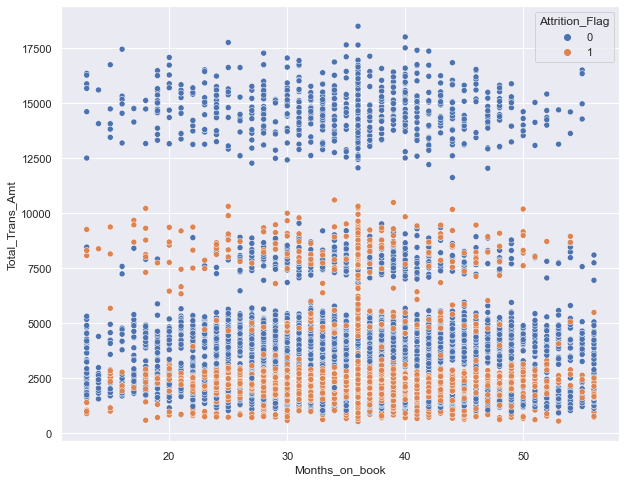

In [58]:
# Months_on_book vs. Total_Trans_Amt (Attrition_Flag)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Months_on_book', y='Total_Trans_Amt',hue='Attrition_Flag')
#ax.set_ylim([15000, 40000])

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Total_Amt_Chng_Q4_Q1'>

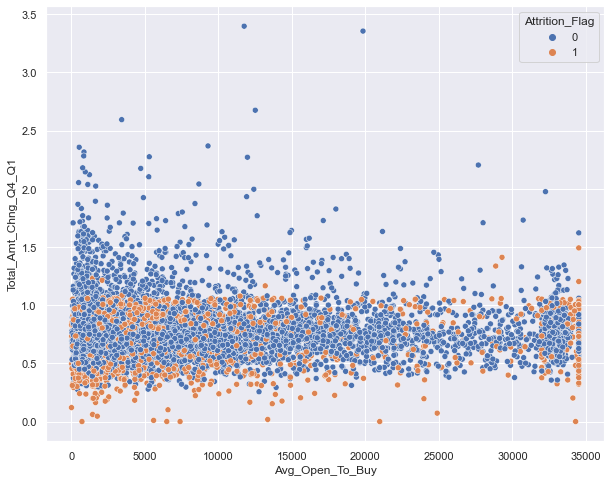

In [59]:
# Total_Amt_Chng_Q4_Q1 vs. Avg_Open_To_Buy (Attrition_Flag)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Avg_Open_To_Buy', y='Total_Amt_Chng_Q4_Q1',hue='Attrition_Flag')
#ax.set_ylim([15000, 40000])

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Total_Trans_Amt'>

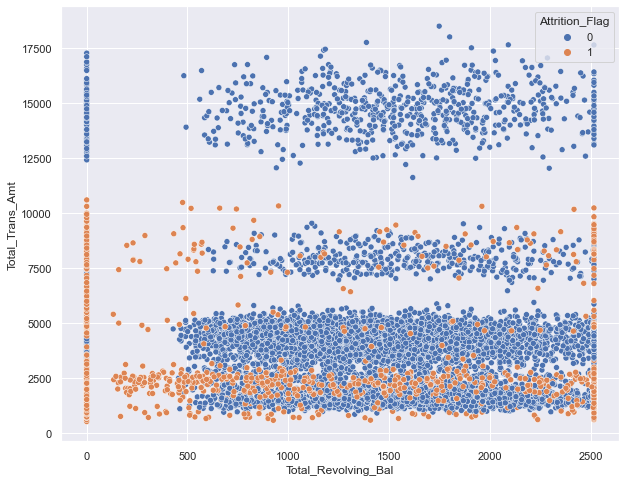

In [60]:
# Months_on_book vs. Total_Revolving_Bal (Attrition_Flag)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Total_Revolving_Bal', y='Total_Trans_Amt',hue='Attrition_Flag')
#ax.set_ylim([15000, 40000])

Features that appear to allow good separation of Attrited and Non-Attrited customers:

- 'Months_on_book' vs. 'Total_Trans_Amt'
- 'Avg_Open_To_Buy' vs. 'Total_Amt_Chng_Q4_Q1'
- 'Total_Revolving_Bal' vs. 'Total_Trans_Amt'

### 02 - Illustrate the insights based on EDA (5)
- Key meaningful observations on the relationship between variables

##### To re-cap from the previous sections:

##### Pure Uni-Variate Observations (alone):

1. Almost 93% of clients have the blue card (another 5% have the silver), so there is a significant bias towards the "lower" end card
2. The values associated with the total period of time a client has been with the bank is very normally distributed - however there is a weird jump right at 36 months (3 years) - is this when an introductory rate/perk ends?
3. A significant number of folks have 0 revolving balance
4. (A) Total transaction amount has 4 peaks in the data - 2000, 4500 (biggest), 8000, and 14000 (smallest)
4. (B) Total transaction count has 2 peaks in the data - 40 and 75
5. Average credit card utilization is dominated by close to 0 utilization

##### Bi-Variate Observations:

<u>Via Pairplot:</u>
- Attritioners appear to have lower transaction count/amount & lower change in transaction count/amounts
- Very linear (almost perfect 1-to-1) relationship between Credit Limit & Avg Open to Buy Credit Line (Maybe able to remove the latter)
- Near linear (almost 1-to-1) relationship between Customer Age & Months on the book (Maybe able to use this information to "fix" anomalous data points occuring at 36 months on the books 

<u>Via Heatmap:</u>
* Strong (Positive) Correlators [0.8 - 1]
 1. Customer_Age and Months_on_book
 2. Credit_Limit and Avg_Open_To_Buy
 3. Total_Trans_Amt and Total_Trans_Ct
* Moderate (Positive) Correlators [0.6 - 0.8]
 1. Avg_Utilization_Ratio and Total_Revolving_Bal
* Weak (Positve AND Negative) Correlators [0.4 - 0.6]
 1. Credit_Limit and Avg_Utilization_Ratio (-)
 2. Avg_Open_To_Buy and Avg_Utilization_Ratio (-)
 3. Total_Ct_Chng_Q4_to_Q1 and Total_Amt_Chng_Q4_to_Q1 (+)

<u> 3 main observations from categorical uni-variate plots (with Target):</u>
- Most plots tend to show a proportional increase/decrease of attrition with increased/decreased continuing customers
- An exception might be Total_Relationship_Count, which seems to have a larger proportion of attrited customers the smaller this feature is
- The vast majority of attrited & non-attrited customers have the basic "Blue" credit card, may need to employ some technique to reduce bias toward predicting just these customers (or create separate models for each card type?) 
 
<u>Observations from continous uni-variate plots (with Target):</u>

Attrited customers tend to have/be:

Lower

 - Credit_Limit (except for Highest Limit)
 - Total_Revolving_Bal (except for Highest Limit)
 - Avg_Open_To_Buy (except for Highest Limit)
 - Total_Amt_Chng_Q4_Q1
 - Total_Trans_Amt
 - Avg_Utilization_Ratio

The Very Highest:

 - Credit_Limit
 - Total_Revolving_Bal
 - Avg_Open_To_Buy

<u> Bi-Variate plots that show features that appear to allow good separation of Attrited and Non-Attrited customers:</u>

 - 'Months_on_book' vs. 'Total_Trans_Amt'
 - 'Avg_Open_To_Buy' vs. 'Total_Amt_Chng_Q4_Q1'
 - 'Total_Revolving_Bal' vs. 'Total_Trans_Amt'




### 03 - Data Pre-processing (5)
- Prepare the data for analysis 
 - Missing value Treatment
 - Outlier Detection(treat, if needed- why or why not )
 - Feature Engineering
 - Prepare data for modeling

- There does not appear to be any missing data (hard NaN's) but there are a lot of UNKNOWN values. I suspect that those rows will either need to be imputed or removed all-together. These are:
 - Education_Level
 - Marital_Status
 - Income_Category
- The plots above indicate that some variables have a lot of outliers (some very strong), but based on the distributions they don't *seem* to be problematic enough to warrant altering/removing. The two most suspicious are:
 - Credit_Limit (the highest values), it seems problematic that there are so many clustered at the end BUT it could be that is just the absolute HARD upper limit for all credit card customers (reguardless of wealth, credit history, etc.)
 - Total_Revolving_Bal (the highest values), there are a disproportionate amount of both HIGH and LOW values. The LOW ones are more expected since most people endevor to keep their balances low to avoid paying interest, but the HIGH values are peculiar BUT they may represent some limit imposed by the credit card company

##### Education_Level

In [61]:
# If Education_Level is an important variable, there are 1519 rows of data
data.loc[((data['Education_Level'] == "Unknown" )),'Education_Level'].size

1519

In [62]:
# If Education_Level is an important variable, there are 256 rows of data associated with Attrition_Flag == 1 (17% of Total UNKNOWN)
data.loc[((data['Education_Level'] == "Unknown" ) & (data['Attrition_Flag'] == 1)),'Education_Level'].size

256

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Credit_Limit'>

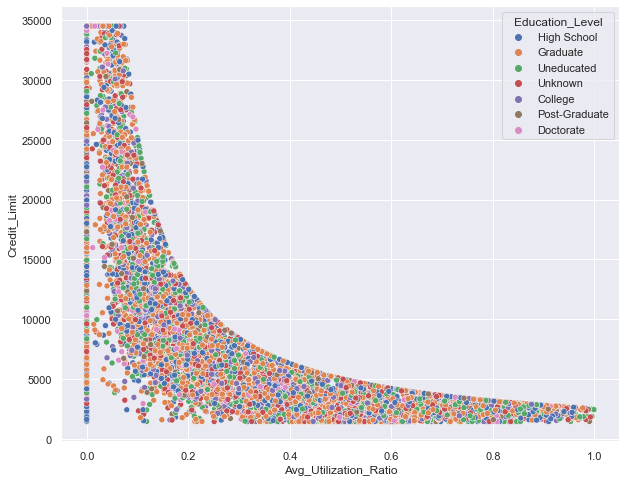

In [63]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Avg_Utilization_Ratio', y='Credit_Limit',hue='Education_Level')

- Unable to find suitable relationship between other continuous variables to imput UNKNOWN values for Education_Level, so removing (See example above)

##### Marital_Status

In [64]:
# If Marital_Status is an important variable, there are 749 rows of data
data.loc[((data['Marital_Status'] == "Unknown" )),'Marital_Status'].size

749

In [65]:
# If Marital_Status is an important variable, there are 129 rows of data associated with Attrition_Flag == 1 (17% of Total UNKNOWN)
data.loc[((data['Marital_Status'] == "Unknown" ) & (data['Attrition_Flag'] == 1)),'Marital_Status'].size

129

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Credit_Limit'>

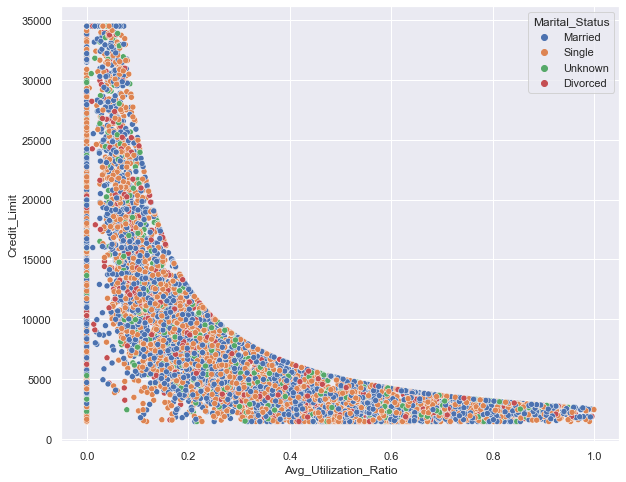

In [66]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Avg_Utilization_Ratio', y='Credit_Limit',hue='Marital_Status')

- Unable to find suitable relationship between other continuous variables to imput UNKNOWN values for Marital_Status, so removing (See example above)

##### Income_Category

In [67]:
# If Income_Category is an important variable, there are 1112 rows of data
data.loc[((data['Income_Category'] == "Unknown" )),'Income_Category'].size

1112

In [68]:
# If Income_Category is an important variable, there are 187 rows of data associated with Attrition_Flag == 1 (17% of Total UNKNOWN)
data.loc[((data['Income_Category'] == "Unknown" ) & (data['Attrition_Flag'] == 1)),'Income_Category'].size

187

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Credit_Limit'>

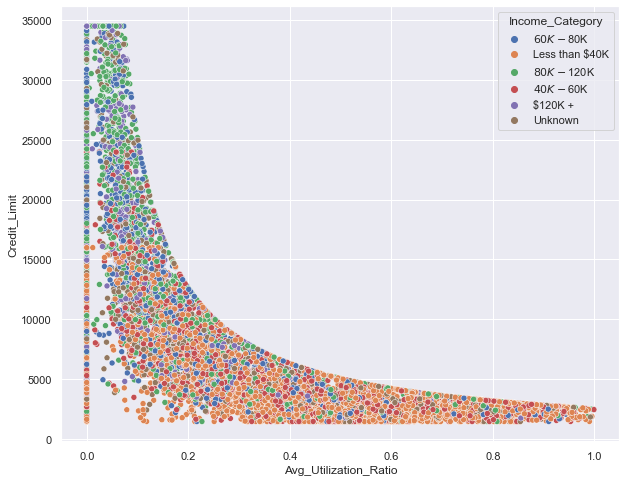

In [69]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Avg_Utilization_Ratio', y='Credit_Limit',hue='Income_Category')

- Potentially suitable relationship between other continuous variables to imput UNKNOWN values for Income_Category
- Still has a lot of mixture with other categories, so removing (See example above)

##### New Data Dictionary for Categorical Entries with String Values:

###### Customer Details:

* Gender: Gender of the account holder
 * 0 = M
 * 1 = F
* Education_Level: Educational Qualification of the account holder
 * 0 = Uneducated
 * 1 = High School
 * 2 = College
 * 3 = Graduate
 * 4 = Post-Graduate
 * 5 = Doctorate
* Marital_Status: Marital Status of the account holder
 * 0 = Single
 * 1 = Divorced
 * 2 = Married
* Income_Category: Annual Income Category of the account holder
 * 0 = Less than 40K
 * 1 = 40K - 60K
 * 2 = 60K - 80K 
 * 3 = 80K - 120K
 * 4 = 120K +
* Card_Category: Type of Card
 * 0 = Blue
 * 1 = Silver
 * 2 = Gold
 * 3 = Platinum


In [70]:
# Gender
data.loc[data['Gender'] == 'M','Gender']=0
data.loc[data['Gender'] == 'F','Gender']=1

# Education_Level
data.loc[data['Education_Level'] == 'Uneducated','Education_Level']=0
data.loc[data['Education_Level'] == 'High School','Education_Level']=1
data.loc[data['Education_Level'] == 'College','Education_Level']=2
data.loc[data['Education_Level'] == 'Graduate','Education_Level']=3
data.loc[data['Education_Level'] == 'Post-Graduate','Education_Level']=4
data.loc[data['Education_Level'] == 'Doctorate','Education_Level']=5
data.loc[data['Education_Level'] == 'Unknown','Education_Level']=np.nan

# Marital_Status
data.loc[data['Marital_Status'] == 'Single','Marital_Status']=0
data.loc[data['Marital_Status'] == 'Divorced','Marital_Status']=1
data.loc[data['Marital_Status'] == 'Married','Marital_Status']=1
data.loc[data['Marital_Status'] == 'Unknown','Marital_Status']=np.nan

#Income_Category
data.loc[data['Income_Category'] == 'Less than $40K','Income_Category']=0
data.loc[data['Income_Category'] == '$40K - $60K','Income_Category']=1
data.loc[data['Income_Category'] == '$60K - $80K','Income_Category']=2
data.loc[data['Income_Category'] == '$80K - $120K','Income_Category']=3
data.loc[data['Income_Category'] == '$120K +','Income_Category']=4
data.loc[data['Income_Category'] == 'Unknown','Income_Category']=np.nan

#Card_Category
data.loc[data['Card_Category'] == 'Blue','Card_Category']=0
data.loc[data['Card_Category'] == 'Silver','Card_Category']=1
data.loc[data['Card_Category'] == 'Gold','Card_Category']=2
data.loc[data['Card_Category'] == 'Platinum','Card_Category']=3


In [71]:
# Drop all rows with NULL values and Reset Index
data.dropna(inplace=True)
data.reset_index(drop=True)

# Reset TYPE
data["Gender"] = data["Gender"].astype("int")
data["Education_Level"] = data["Education_Level"].astype("int")
data["Marital_Status"] = data["Marital_Status"].astype("int")
data["Income_Category"] = data["Income_Category"].astype("int")
data["Card_Category"] = data["Card_Category"].astype("int")

In [72]:
# Verify Changes with Value counts
cat_cols=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3706
1    3375
Name: Gender, dtype: int64
------------------------------
3    2591
1    1653
0    1204
2     844
4     431
5     358
Name: Education_Level, dtype: int64
------------------------------
1    4133
0    2948
Name: Marital_Status, dtype: int64
------------------------------
0    2792
1    1412
3    1202
2    1103
4     572
Name: Income_Category, dtype: int64
------------------------------
0    6598
1     391
2      81
3      11
Name: Card_Category, dtype: int64
------------------------------


In [73]:
# Verify data type changed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   int32  
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   int32  
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   int32  
 5   Marital_Status            7081 non-null   int32  
 6   Income_Category           7081 non-null   int32  
 7   Card_Category             7081 non-null   int32  
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Avg_Ope

In [74]:
# Attrition_Flag == 0
data.loc[((data['Attrition_Flag'] == 0 )),'Attrition_Flag'].size

5968

In [75]:
# Attrition_Flag == 1
data.loc[((data['Attrition_Flag'] == 1 )),'Attrition_Flag'].size

1113

- Started with a total of 10127 rows (8500 with Attrition_Flag = 0 & 1627 with Attrition_Flag = 1)
- After removing rows with UNKNOWN values, we have a total of 7081 rows (5968 with Attrition_Flag = 0 & 1113 with Attrition_Flag = 1)
- Reduction of ~30% (is this too much? Use up/down sampling to make up?)

##### Split the data

In [76]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

In [77]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(4956, 19) (2125, 19)


##### Define Metric Evaluation Tools

In [78]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### 04 - Model building - Logistic Regression (6)
- Make a logistic regression model 
- Improve model performance by up and downsampling the data 
- Regularize above models, if required

#### Make Logistic Regression model (No Up/Down sampling)

In [80]:
logistic_reg_estimator=LogisticRegression(max_iter=1000)
logistic_reg_estimator.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [81]:
#Using above defined function to get accuracy, recall and precision on train and test set
logistic_reg_estimator_score=get_metrics_score(logistic_reg_estimator)

Accuracy on training set :  0.8910411622276029
Accuracy on test set :  0.8856470588235295
Recall on training set :  0.49550706033376124
Recall on test set :  0.47604790419161674
Precision on training set :  0.724202626641651
Precision on test set :  0.7004405286343612


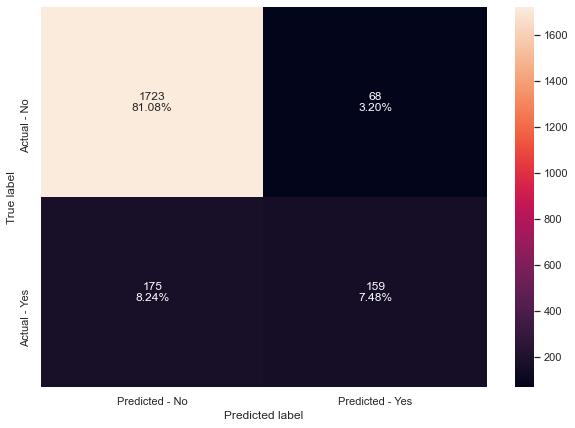

In [82]:
make_confusion_matrix(logistic_reg_estimator,y_test)

#### UpSample smaller class / DownSample larger class

##### SMOTE to upsample smaller class

In [83]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '1': 779
Before UpSampling, counts of label '0': 4177 

After UpSampling, counts of label '1': 4177
After UpSampling, counts of label '0': 4177 

After UpSampling, the shape of train_X: (8354, 19)
After UpSampling, the shape of train_y: (8354,) 



In [84]:
# fit model on upsampled data 
logistic_reg_UP_estimator=LogisticRegression(max_iter=1000)
logistic_reg_UP_estimator.fit(X_train_res,y_train_res)

LogisticRegression(max_iter=1000)

In [85]:
#Using above defined function to get accuracy, recall and precision on train and test set
logistic_reg_UP_estimator_score=get_metrics_score(logistic_reg_UP_estimator)

Accuracy on training set :  0.8339386602098466
Accuracy on test set :  0.8164705882352942
Recall on training set :  0.772785622593068
Recall on test set :  0.7514970059880239
Precision on training set :  0.4823717948717949
Precision on test set :  0.449820788530466


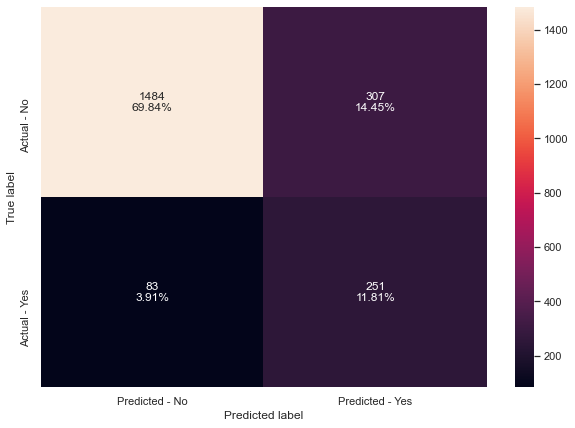

In [86]:
make_confusion_matrix(logistic_reg_UP_estimator,y_test)

- THE GOOD - Predicted Attrition (YES) vs. Actual Attrition (YES) went up from 159 to 251 (Less False Negatives)
- THE BAD - However, Predicted Attrition (YES) vs. Actual NO Attrition (NO) also went up from 68 to 307 (More False Positives)

##### DownSample the larger class

In [87]:
non_Attr_indices = data[data['Attrition_Flag'] == 0].index   # Get the record numbers of non-Attr cases
non_Attr = len(data[data['Attrition_Flag'] == 0])             # how many non-Attr cases
print(non_Attr)

Attr_indices = data[data['Attrition_Flag'] == 1].index       # record number of the diabeteics cases
Attr = len(data[data['Attrition_Flag'] == 1])                # how many diabetic cases
print(Attr)


5968
1113


In [88]:
random_indices = np.random.choice( non_Attr_indices, non_Attr - 4800 , replace=False)    #Randomly pick up 4800 non-Attr indices

In [89]:
down_sample_indices = np.concatenate([Attr_indices,random_indices])  # combine the 4800 non-Attr indices with Attr indices

In [90]:
data_down_sample = data.loc[down_sample_indices]  # Extract all those records for Attr and non-Attr to create new set
data_down_sample.shape
data_down_sample.groupby(["Attrition_Flag"]).count()  # look at the class distribution after downsample

Customer_Age  Gender  Dependent_count  Education_Level  \
Attrition_Flag                                                           
0                       1168    1168             1168             1168   
1                       1113    1113             1113             1113   

                Marital_Status  Income_Category  Card_Category  \
Attrition_Flag                                                   
0                         1168             1168           1168   
1                         1113             1113           1113   

                Months_on_book  Total_Relationship_Count  \
Attrition_Flag                                             
0                         1168                      1168   
1                         1113                      1113   

                Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
Attrition_Flag                                                                
0                                 1168                   1168          1168   
1                                 1113                   1113          1113   

                Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
Attrition_Flag                                                               
0                              1168             1168                  1168   
1                              1113             1113                  1113   

                Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag                                                         
0                          1168            1168                 1168   
1                          1113            1113                 1113   

                Avg_Utilization_Ratio  
Attrition_Flag                         
0                                1168  
1                                1113

In [91]:
# Separating target variable and other variables
X_down = data_down_sample.drop(columns="Attrition_Flag")
y_down = data_down_sample["Attrition_Flag"]

In [92]:
X_down.shape

(2281, 19)

In [93]:
y_down.shape

(2281,)

In [97]:
# Splitting the data into train and test sets
X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(
    X_down, y_down, test_size=0.30, random_state=1, stratify=y_down
)
print(X_down_train.shape, X_down_test.shape)

(1596, 19) (685, 19)


In [98]:
# fit model on upsampled data 
logistic_reg_DOWN_estimator=LogisticRegression(max_iter=1000)
logistic_reg_DOWN_estimator.fit(X_down_train,y_down_train)

LogisticRegression(max_iter=1000)

In [100]:
#Using above defined function to get accuracy, recall and precision on train and test set
logistic_reg_DOWN_estimator_score=get_metrics_score(logistic_reg_DOWN_estimator)

Accuracy on training set :  0.819410815173527
Accuracy on test set :  0.7985882352941176
Recall on training set :  0.8202824133504493
Recall on test set :  0.781437125748503
Precision on training set :  0.4583931133428981
Precision on test set :  0.4237012987012987


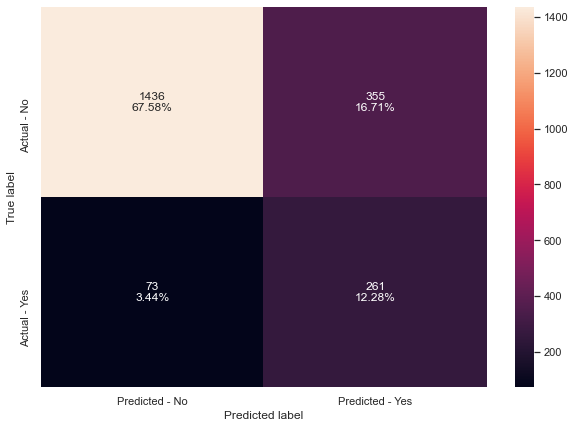

In [103]:
make_confusion_matrix(logistic_reg_DOWN_estimator,y_test)

- THE GOOD - Predicted Attrition (YES) vs. Actual Attrition (YES) went up from 159 to 261 (Less False Negatives)
- THE BAD - However, Predicted Attrition (YES) vs. Actual NO Attrition (NO) also went up from 68 to 355 (More False Positives)

### 05 - Model building - Bagging and Boosting (8)
- Build Decision tree, random forest, bagging classifier models 
- Build Xgboost, AdaBoost, and gradient boosting models

##### Bagging Classifier

In [106]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1,bootstrap=True)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [107]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9967715899919289
Accuracy on test set :  0.9562352941176471
Recall on training set :  0.982028241335045
Recall on test set :  0.7964071856287425
Precision on training set :  0.9973924380704041
Precision on test set :  0.9140893470790378


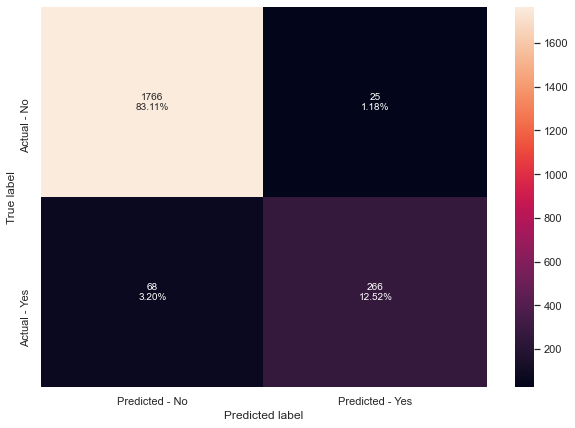

In [109]:
make_confusion_matrix(bagging_estimator,y_test)

- Just with Bagging Classifier, doing much better than plain Logistic Regression with and without resampling!!!

##### Random Forest

In [110]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [111]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9581176470588235
Recall on training set :  1.0
Recall on test set :  0.7994011976047904
Precision on training set :  1.0
Precision on test set :  0.9238754325259516


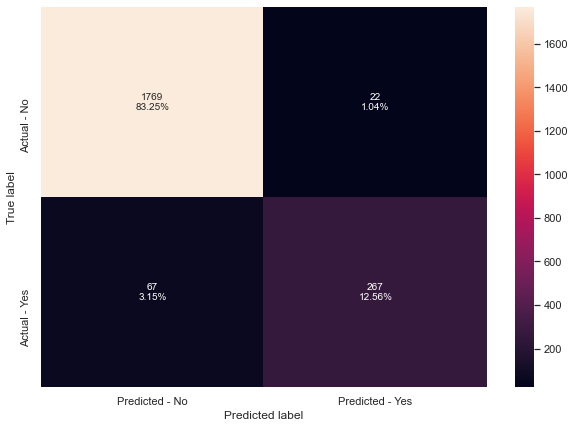

In [112]:
make_confusion_matrix(rf_estimator,y_test)

- Almost identical to Bagging Classification

##### Decision Tree

In [113]:
#Train the decision tree classifier
dtree_estimator=DecisionTreeClassifier(random_state=1)
dtree_estimator.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [114]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_estimator_score=get_metrics_score(dtree_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9331764705882353
Recall on training set :  1.0
Recall on test set :  0.7664670658682635
Precision on training set :  1.0
Precision on test set :  0.8


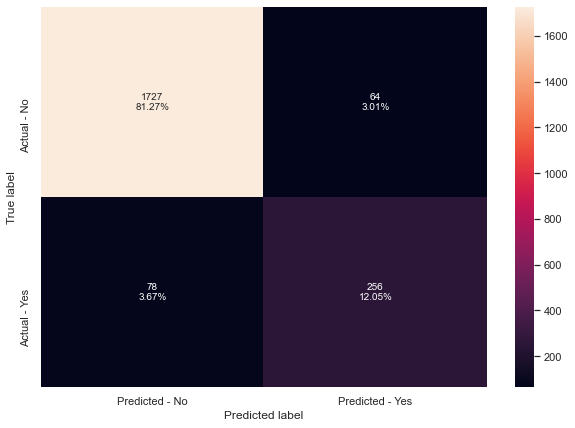

In [115]:
make_confusion_matrix(dtree_estimator,y_test)

- Slightly worse performance than Bagging and Random Forest

#### *AdaBoost*

In [118]:
ab_estimator=AdaBoostClassifier(random_state=1)
ab_estimator.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [119]:
#Using above defined function to get accuracy, recall and precision on train and test set
ab_estimator_score=get_metrics_score(ab_estimator)

Accuracy on training set :  0.965496368038741
Accuracy on test set :  0.944
Recall on training set :  0.8639281129653402
Recall on test set :  0.7874251497005988
Precision on training set :  0.9119241192411924
Precision on test set :  0.8456591639871383


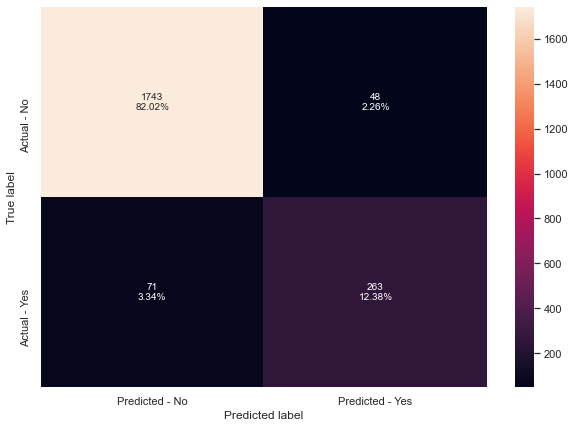

In [127]:
make_confusion_matrix(ab_estimator,y_test)

 - Slightly better than Decision Tree, but worse than Bagging and Random Forest Classifiers

#### *Gradient Boost*

In [121]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [122]:
#Using above defined function to get accuracy, recall and precision on train and test set
gb_estimator_score=get_metrics_score(gb_estimator)

Accuracy on training set :  0.9790153349475383
Accuracy on test set :  0.9567058823529412
Recall on training set :  0.8985879332477535
Recall on test set :  0.8053892215568862
Precision on training set :  0.9655172413793104
Precision on test set :  0.9087837837837838


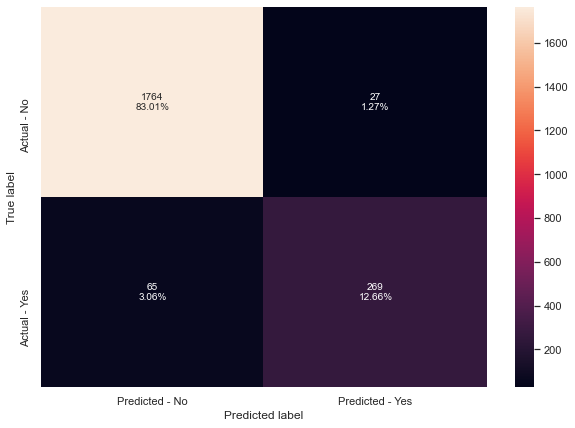

In [128]:
make_confusion_matrix(gb_estimator,y_test)

- Almost identical to Bagging and Random Forest Classifiers

#### *XGBoost*

In [124]:
xgb_estimator=XGBClassifier(random_state=1)
xgb_estimator.fit(X_train,y_train)

[06:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_estimator_score=get_metrics_score(xgb_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.963764705882353
Recall on training set :  1.0
Recall on test set :  0.8652694610778443
Precision on training set :  1.0
Precision on test set :  0.9003115264797508


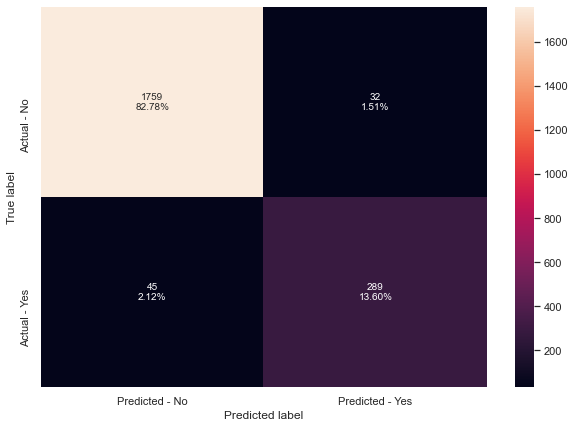

In [129]:
make_confusion_matrix(xgb_estimator,y_test)

- Best performer, has the most True Positives while minimizing both False Positives and True Negatives

**Insights:**

* True Positives:
 * Reality: A customer decided to cancel credit card.
 * Model predicted: The customer will cancel credit card.
 * Outcome: The model is good.

* True Negatives:
 * Reality: A customer did NOT cancel credit card.
 * Model predicted: The customer will NOT cancel credit card.
 * Outcome: The business is unaffected.

* False Positives:
 * Reality: A customer did NOT cancel credit card.
 * Model predicted: The customer will cancel credit card.
 * Outcome: The team which is targeting the potential attritors will be wasting their resources on the people/customers who will be keeping their credit card.

* False Negatives:
 * Reality: A customer decided to cancel credit card.
 * Model predicted: The customer will NOT cancel credit card.
 * Outcome: The potential attritor will not be identified and may cancel their credit card




### 06 - Hyperparameter tuning using grid search (8)
- Tune all the models using grid search 
- Use pipelines in hyperparameter tuning

#### *Tuning Bagging Classifier*

In [140]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1,bootstrap=True))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "baggingclassifier__n_estimators": [7,15,51,101,151],
    "baggingclassifier__max_features": [0.7,0.8,0.9,1],
    "baggingclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'baggingclassifier__max_features': 0.9, 'baggingclassifier__n_estimators': 15} 
Score: 0.6828949545078578
Wall time: 54.3 s


In [143]:
# Creating new pipeline with best parameters
bc_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=15,
        max_features=0.9,
        random_state=1,
    ),
)

# Fit the model on training data
bc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                         random_state=1),
                                   max_features=0.9, n_estimators=15,
                                   random_state=1))])

In [144]:
#Using above defined function to get accuracy, recall and precision on train and test set
bc_estimator_score=get_metrics_score(bc_tuned1)

Accuracy on training set :  0.9257465698143664
Accuracy on test set :  0.9195294117647059
Recall on training set :  0.7252888318356868
Recall on test set :  0.7095808383233533
Precision on training set :  0.7858136300417247
Precision on test set :  0.7620578778135049


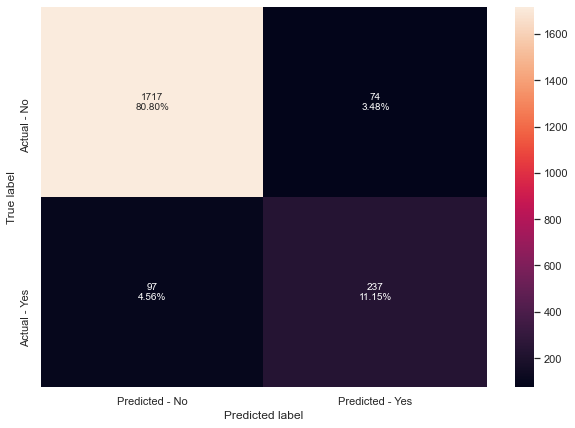

In [142]:
make_confusion_matrix(bc_tuned1,y_test)

- Worse performance WITH tuning
- More consistent performance for Train & Test datasets

#### *Tuning Random Forest Classifier*

In [145]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__max_features": ['sqrt','log2','auto'],
    "randomforestclassifier__min_samples_leaf": np.arange(1,15,5),
    "randomforestclassifier__min_samples_split": np.arange(2, 20, 5),
    "randomforestclassifier__n_estimators": list(np.linspace(10, 50, 10, dtype = int))
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 41} 
Score: 0.771505376344086
Wall time: 3min 8s


In [153]:
# Creating new pipeline with best parameters
rfc_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True,
        n_estimators=41,
        max_features='sqrt',
        min_samples_leaf=1,
        min_samples_split=2
    ),
)

# Fit the model on training data
rfc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt', n_estimators=41,
                                        oob_score=True, random_state=1))])

In [154]:
#Using above defined function to get accuracy, recall and precision on train and test set
rfc_estimator_score=get_metrics_score(rfc_tuned1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9581176470588235
Recall on training set :  1.0
Recall on test set :  0.7964071856287425
Precision on training set :  1.0
Precision on test set :  0.926829268292683


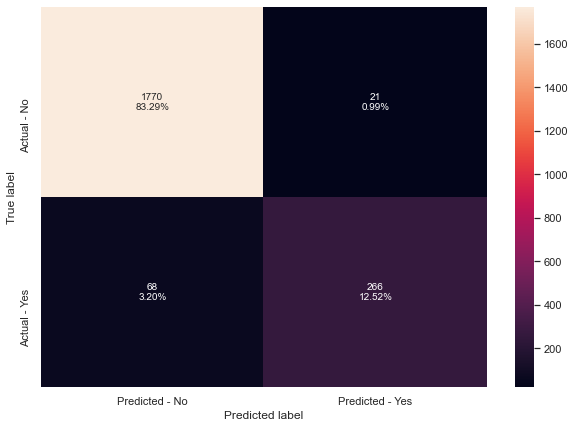

In [160]:
make_confusion_matrix(rfc_tuned1,y_test)

- Nearly identical to non-hyperturned model

#### *Tuning Decision Tree Classifier*

In [156]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__max_depth": np.arange(2,30),
    "decisiontreeclassifier__min_samples_leaf": [1, 2, 5, 7, 10],
    "decisiontreeclassifier__max_leaf_nodes" : [5, 10, 15, 20, 25],
    "decisiontreeclassifier__min_impurity_decrease": [0.00001,0.0001,0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_leaf_nodes': 25, 'decisiontreeclassifier__min_impurity_decrease': 1e-05, 'decisiontreeclassifier__min_samples_leaf': 7} 
Score: 0.799801488833747
Wall time: 3min 26s


In [157]:
# Creating new pipeline with best parameters
dtc_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1,
        max_depth=5,
        max_leaf_nodes= 25,
        min_impurity_decrease= 0.00001,
        min_samples_leaf= 7
    ),
)

# Fit the model on training data
dtc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25,
                                        min_impurity_decrease=1e-05,
                                        min_samples_leaf=7, random_state=1))])

In [158]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtc_estimator_score=get_metrics_score(dtc_tuned1)

Accuracy on training set :  0.9493543179983858
Accuracy on test set :  0.9336470588235294
Recall on training set :  0.8048780487804879
Recall on test set :  0.7724550898203593
Precision on training set :  0.8636363636363636
Precision on test set :  0.7987616099071208


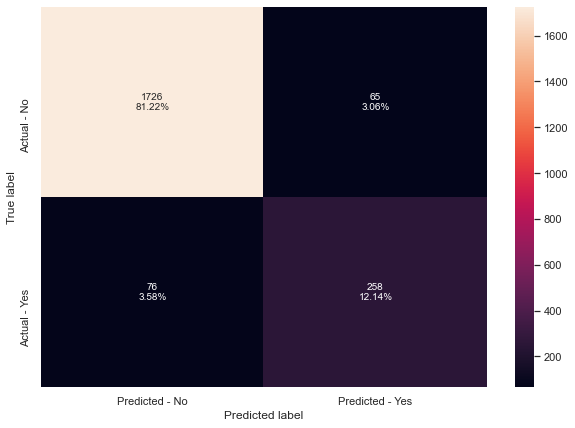

In [161]:
make_confusion_matrix(dtc_tuned1,y_test)

- Nearly identical to non-Hypertuned model

#### *Tuning AdaBoost Classifier*

In [131]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.5, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.8690653432588917
Wall time: 3min 10s


In [136]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])

In [137]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_estimator_GSCV_score=get_metrics_score(abc_tuned1)

Accuracy on training set :  0.9987893462469734
Accuracy on test set :  0.9604705882352941
Recall on training set :  0.9974326059050064
Recall on test set :  0.8652694610778443
Precision on training set :  0.9948783610755442
Precision on test set :  0.8810975609756098


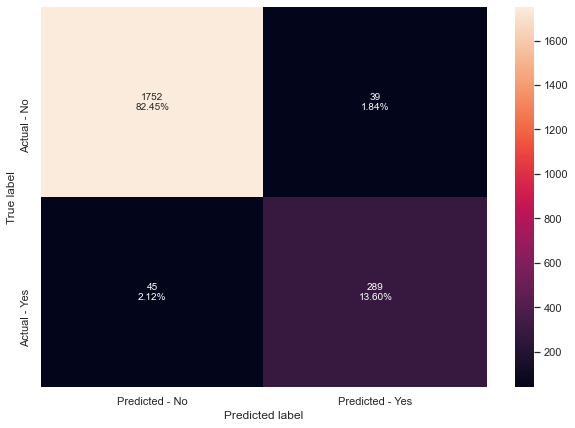

In [162]:
make_confusion_matrix(abc_tuned1,y_test)

-Better performance, but maybe be over-fitting now

#### *Tuning Gradient Boost Classifier*

In [163]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'gradientboostingclassifier__n_estimators': np.arange(50,200,25),
    'gradientboostingclassifier__subsample':[0.7,0.8,0.9,1],
    'gradientboostingclassifier__max_features':[0.7,0.8,0.9,1],
    'gradientboostingclassifier__max_depth':[3,5,7,10]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__n_estimators': 175, 'gradientboostingclassifier__subsample': 0.9} 
Score: 0.8729197684036393
Wall time: 25min 39s


In [164]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1,        
        n_estimators=175,
        subsample=0.9,
        max_features=0.8,
        max_depth=5
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features=0.8,
                                            n_estimators=175, random_state=1,
                                            subsample=0.9))])

In [165]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_estimator_GSCV_score=get_metrics_score(gbc_tuned1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9656470588235294
Recall on training set :  1.0
Recall on test set :  0.8592814371257484
Precision on training set :  1.0
Precision on test set :  0.9169329073482428


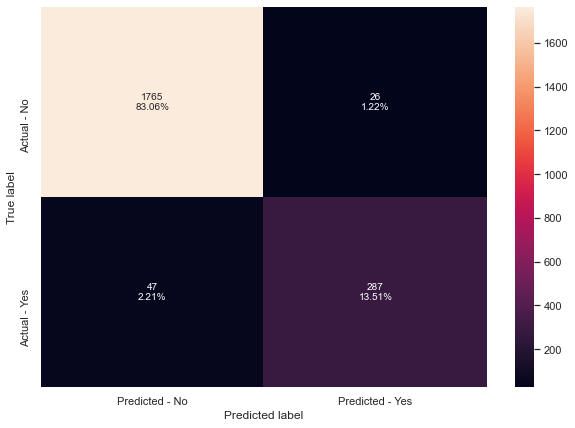

In [166]:
make_confusion_matrix(gbc_tuned1,y_test)

- Again, also performance is a bit better with tuned parameters, but at the cost of being over-fit

#### *Tuning XGBoost Classifier*

In [167]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'xgbclassifier__n_estimators': [75,100,125,150],
    'xgbclassifier__subsample':[0.7, 0.8, 0.9, 1],
    'xgbclassifier__gamma':[0, 1, 3, 5],
    'xgbclassifier__colsample_bytree':[0.7, 0.8, 0.9, 1],
    'xgbclassifier__colsample_bylevel':[0.7, 0.8, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

[08:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters:{'xgbclassifier__colsample_bylevel': 0.8, 'xgbclassifier__colsample_bytree': 1, 'xgbclassifier__gamma': 1, 'xgbclassifier__n_estimators': 125, 'xgbclassifier__subsample': 1} 
Score: 0.8780562448304383
Wall time: 30min 21s


In [168]:
# Creating new pipeline with best parameters
xgbc_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(random_state=1,
        n_estimators=125,
        subsample=1,
        gamma=1,
        colsample_bytree=1,
        colsample_bylevel=0.8
    ),
)

# Fit the model on training data
xgbc_tuned1.fit(X_train, y_train)

[08:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.8, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=125,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [169]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgbc_estimator_GSCV_score=get_metrics_score(xgbc_tuned1)

Accuracy on training set :  0.9997982243744956
Accuracy on test set :  0.9651764705882353
Recall on training set :  0.9987163029525032
Recall on test set :  0.8622754491017964
Precision on training set :  1.0
Precision on test set :  0.9113924050632911


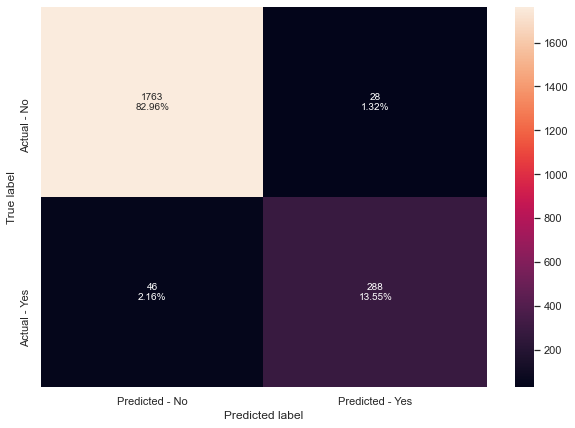

In [170]:
make_confusion_matrix(xgbc_tuned1,y_test)

- Slightly, better performance with tuned model. All models performing equally now.

### 07 - Hyperparameter tuning using random search (8)
- Tune all the models using randomized search 
- Use pipelines in hyperparameter tuning

##### Bagging Classification

In [173]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1,bootstrap=True))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "baggingclassifier__n_estimators": [7,15,51,101,151],
    "baggingclassifier__max_features": [0.7,0.8,0.9,1],
    "baggingclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__n_estimators': 15, 'baggingclassifier__max_features': 0.9, 'baggingclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} 
Score: 0.6828949545078578
Wall time: 47.3 s


In [181]:
# Creating new pipeline with best parameters
bc_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=15,
        max_features=0.9,
        random_state=1,
    ),
)

# Fit the model on training data
bc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                         random_state=1),
                                   max_features=0.9, n_estimators=15,
                                   random_state=1))])

In [185]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_estimator_RSCV_score=get_metrics_score(bc_tuned2)

Accuracy on training set :  0.9257465698143664
Accuracy on test set :  0.9195294117647059
Recall on training set :  0.7252888318356868
Recall on test set :  0.7095808383233533
Precision on training set :  0.7858136300417247
Precision on test set :  0.7620578778135049


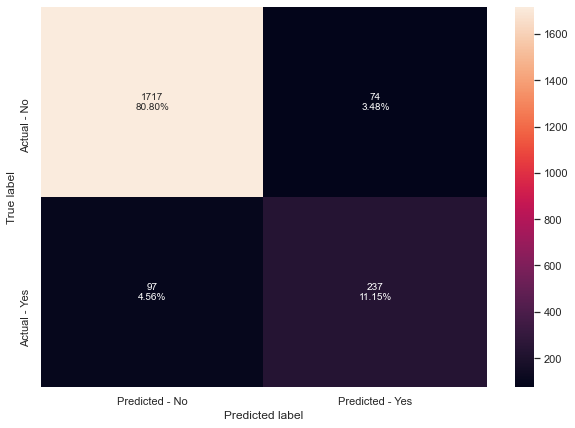

In [183]:
make_confusion_matrix(bc_tuned2,y_test)

##### Random Forest  Classification

In [175]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__max_features": ['sqrt','log2','auto'],
    "randomforestclassifier__min_samples_leaf": np.arange(1,15,5),
    "randomforestclassifier__min_samples_split": np.arange(2, 20, 5),
    "randomforestclassifier__n_estimators": list(np.linspace(10, 50, 10, dtype = int))
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe,  param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,random_state=1,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 7, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'log2'} 
Score: 0.771505376344086
Wall time: 27.9 s


In [187]:
# Creating new pipeline with best parameters
rfc_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True,
        n_estimators=50,
        max_features='log2',
        min_samples_leaf=1,
        min_samples_split=7
    ),
)

# Fit the model on training data
rfc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='log2',
                                        min_samples_split=7, n_estimators=50,
                                        oob_score=True, random_state=1))])

In [188]:
#Using above defined function to get accuracy, recall and precision on train and test set
rfc_estimator_RSCV_score=get_metrics_score(rfc_tuned2)

Accuracy on training set :  0.994955609362389
Accuracy on test set :  0.9529411764705882
Recall on training set :  0.9730423620025674
Recall on test set :  0.7844311377245509
Precision on training set :  0.994750656167979
Precision on test set :  0.903448275862069


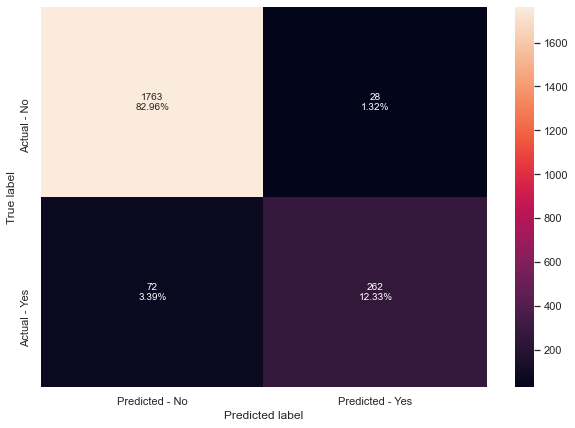

In [189]:
make_confusion_matrix(rfc_tuned2,y_test)

##### Decision Tree Classification

In [176]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__max_depth": np.arange(2,30),
    "decisiontreeclassifier__min_samples_leaf": [1, 2, 5, 7, 10],
    "decisiontreeclassifier__max_leaf_nodes" : [5, 10, 15, 20, 25],
    "decisiontreeclassifier__min_impurity_decrease": [0.00001,0.0001,0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,random_state=1,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_impurity_decrease': 0.001, 'decisiontreeclassifier__max_leaf_nodes': 20, 'decisiontreeclassifier__max_depth': 26} 
Score: 0.7817866004962779
Wall time: 3.13 s


In [190]:
# Creating new pipeline with best parameters
dtc_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1,
        max_depth=26,
        max_leaf_nodes= 20,
        min_impurity_decrease= 0.001,
        min_samples_leaf= 1
    ),
)

# Fit the model on training data
dtc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=26, max_leaf_nodes=20,
                                        min_impurity_decrease=0.001,
                                        random_state=1))])

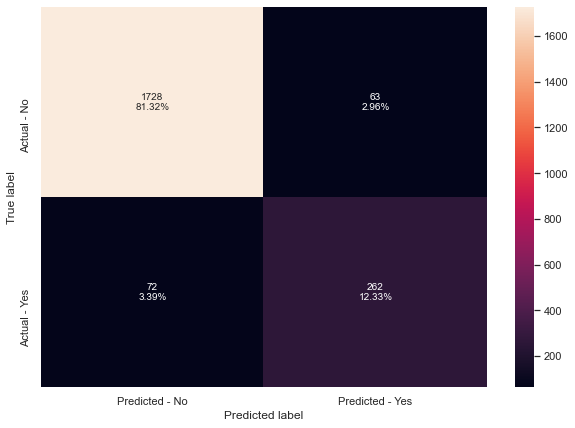

In [191]:
make_confusion_matrix(dtc_tuned2,y_test)

##### AdaBoost Classification

In [177]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.5, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,random_state=1,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} 
Score: 0.8690653432588917
Wall time: 1min 9s


In [192]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])

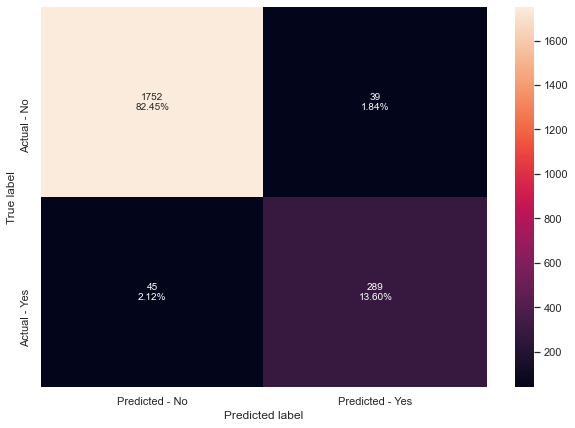

In [193]:
make_confusion_matrix(abc_tuned2,y_test)

##### Gradient Boosting Classification

In [179]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'gradientboostingclassifier__n_estimators': np.arange(50,200,25),
    'gradientboostingclassifier__subsample':[0.7,0.8,0.9,1],
    'gradientboostingclassifier__max_features':[0.7,0.8,0.9,1],
    'gradientboostingclassifier__max_depth':[3,5,7,10]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,random_state=1,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__n_estimators': 175, 'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__max_depth': 5} 
Score: 0.8639371381306866
Wall time: 3min 37s


In [194]:
# Creating new pipeline with best parameters
gbc_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1,        
        n_estimators=175,
        subsample=0.8,
        max_features=0.7,
        max_depth=5
    ),
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features=0.7,
                                            n_estimators=175, random_state=1,
                                            subsample=0.8))])

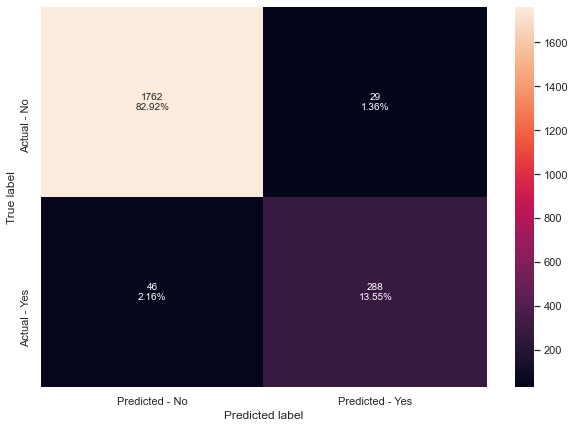

In [195]:
make_confusion_matrix(gbc_tuned2,y_test)

##### XGBoost Classification

In [180]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'xgbclassifier__n_estimators': [75,100,125,150],
    'xgbclassifier__subsample':[0.7, 0.8, 0.9, 1],
    'xgbclassifier__gamma':[0, 1, 3, 5],
    'xgbclassifier__colsample_bytree':[0.7, 0.8, 0.9, 1],
    'xgbclassifier__colsample_bylevel':[0.7, 0.8, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,random_state=1,n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

[09:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters:{'xgbclassifier__subsample': 1, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__gamma': 1, 'xgbclassifier__colsample_bytree': 1, 'xgbclassifier__colsample_bylevel': 0.8} 
Score: 0.8754838709677418
Wall time: 1min 36s


In [196]:
# Creating new pipeline with best parameters
xgbc_tuned2 = make_pipeline(
    StandardScaler(),
    XGBClassifier(random_state=1,
        n_estimators=150,
        subsample=1,
        gamma=1,
        colsample_bytree=1,
        colsample_bylevel=0.8
    ),
)

# Fit the model on training data
xgbc_tuned2.fit(X_train, y_train)

[09:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.8, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

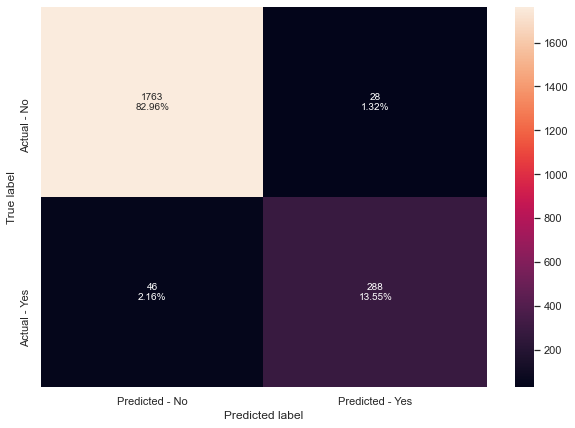

In [197]:
make_confusion_matrix(xgbc_tuned2,y_test)

#### Summary

Similar performance as GridSearch (which searches across the entire parameter space, but job runs in a few minutes rather than (up to) 30 min!

### 08 - Model Performances (5)
- Compare the model performance of all the models 
- Comment on the time taken by the grid and randomized search in optimization

In [198]:
# defining list of models
models = [bagging_estimator, bc_tuned1, bc_tuned2, 
          rf_estimator, rfc_tuned1, rfc_tuned2,
          dtree_estimator, dtc_tuned1, dtc_tuned2,
          ab_estimator, abc_tuned1, abc_tuned2,
          gb_estimator, gbc_tuned1, gbc_tuned2,
          xgb_estimator, xgbc_tuned1, xgbc_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [200]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Bagging Classification (Default)",
            "Bagging Classification Tuned (GridSearch)",
            "Bagging Classification Tuned (RandomSearch, 50 iter)",
            "Random Forest Classification (Default)",
            "Random Forest Classification Tuned (GridSearch)",
            "Random Forest Classification Tuned (RandomSearch, 50 iter)",
            "Decision Tree Classification (Default)",
            "Decision Tree Classification Tuned (GridSearch)",
            "Decision Tree Classification Tuned (RandomSearch, 50 iter)",
            "AdaBoost Classification (Default)",
            "AdaBoost Classification Tuned (GridSearch)",
            "AdaBoost Classification Tuned (RandomSearch, 50 iter)",
            "Gradient Boost Classification (Default)",
            "Gradient Boost Classification Tuned (GridSearch)",
            "Gradient Boost Classification Tuned (RandomSearch, 50 iter)",
            "XGBoost Classification (Default)",
            "XGBoost Classification Tuned (GridSearch)",
            "XGBoost Classification Tuned (RandomSearch, 50 iter)"            
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  \
10         AdaBoost Classification Tuned (GridSearch)        0.998789   
15                   XGBoost Classification (Default)        1.000000   
11  AdaBoost Classification Tuned (RandomSearch, 5...        0.998789   
17  XGBoost Classification Tuned (RandomSearch, 50...        0.999798   
16          XGBoost Classification Tuned (GridSearch)        0.999798   
14  Gradient Boost Classification Tuned (RandomSea...        1.000000   
13   Gradient Boost Classification Tuned (GridSearch)        1.000000   
12            Gradient Boost Classification (Default)        0.979015   
3              Random Forest Classification (Default)        1.000000   
0                    Bagging Classification (Default)        0.996772   
9                   AdaBoost Classification (Default)        0.965496   
8   Decision Tree Classification Tuned (RandomSear...        0.954399   
5   Random Forest Classification Tuned (RandomSear...        0.994956   
4     Random Forest Classification Tuned (GridSearch)        0.994956   
7     Decision Tree Classification Tuned (GridSearch)        0.949354   
6              Decision Tree Classification (Default)        1.000000   
1           Bagging Classification Tuned (GridSearch)        0.925747   
2   Bagging Classification Tuned (RandomSearch, 50...        0.925747   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
10       0.960471      0.997433     0.865269         0.994878        0.881098  
15       0.963765      1.000000     0.865269         1.000000        0.900312  
11       0.960471      0.997433     0.865269         0.994878        0.881098  
17       0.965176      0.998716     0.862275         1.000000        0.911392  
16       0.965176      0.998716     0.862275         1.000000        0.911392  
14       0.964706      1.000000     0.862275         1.000000        0.908517  
13       0.965647      1.000000     0.859281         1.000000        0.916933  
12       0.956706      0.898588     0.805389         0.965517        0.908784  
3        0.958118      1.000000     0.799401         1.000000        0.923875  
0        0.956235      0.982028     0.796407         0.997392        0.914089  
9        0.944000      0.863928     0.787425         0.911924        0.845659  
8        0.936471      0.835687     0.784431         0.869159        0.806154  
5        0.952941      0.973042     0.784431         0.994751        0.903448  
4        0.952941      0.973042     0.784431         0.994751        0.903448  
7        0.933647      0.804878     0.772455         0.863636        0.798762  
6        0.933176      1.000000     0.766467         1.000000        0.800000  
1        0.919529      0.725289     0.709581         0.785814        0.762058  
2        0.919529      0.725289     0.709581         0.785814        0.762058

- Tuned AdaBoost Classification (with GridSearch) appears to have the best performance (in terms of Recall) and robustness

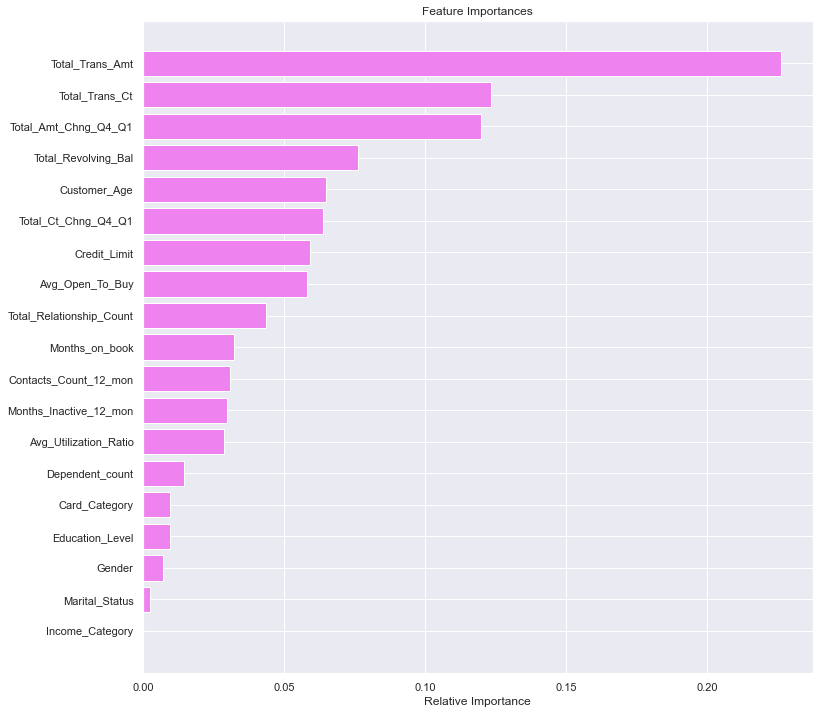

In [202]:
feature_names = X_train.columns
importances = abc_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Top three most important features appear to be:
- Total Transaction Amounts
- Total Transaction Counts
- Total Amount Change from Q4 to Q1

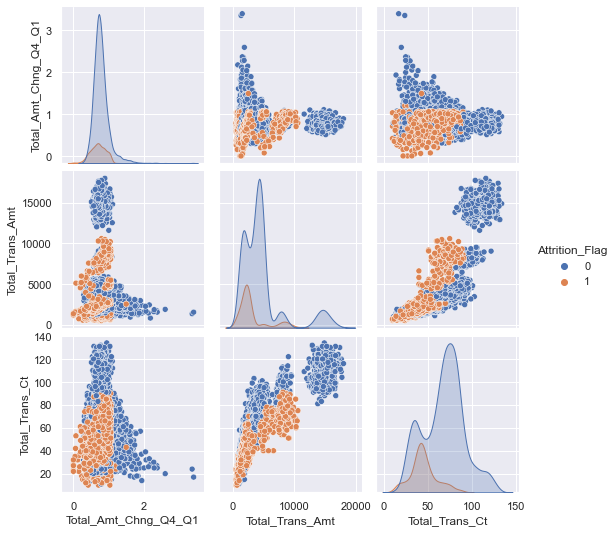

In [203]:
#Pairplot only continuous features to get basic feel
sns.pairplot(data=data,hue="Attrition_Flag",vars=['Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct'])
plt.show()

### 09 - Actionable Insights & Recommendations (5)
- Business recommendations and insights

#### Business Recommendations

- The best model (in terms of all the scoring criteria - i.e., Accuracy, Recall, and Precision) for predicting whether a credit card customer will renounce their cards, is the tuned AdaBoost model (using GridSearchCV) with parameters:
 - base_estimator = DecisionTreeClassifier(max_depth=2, random_state=1), 
 - learning_rate = 1,
 - n_estimators = 90 
- The scoring criteria for this model was:
 - Test Accuracy = 96%
 - Test Recall = 86.5%
 - Test Precision = 88%
- The top 8 most important features are all Numerical/Continous data (NOT CATEGORICAL):
 1. Total_Trans_Amt
 2. Total_Trans_Ct
 3. Total_Amt_Chng_Q4_Q1
 4. Total_Revolving_Bal
 5. Customer_Age
 6. Total_Ct_Chng_Q4_Q1
 7. Credit_Limit
 8. Avg_Open_To_Buy
-Company should target customers with LOWER Total Amount Change between Q4 and Q1, Total Transaction amounts, and Total Transaction Counts if they want to target them with special offers to keep their business
 